In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import gridspec, rc
import matplotlib as mpl
import mplhep as hep
import seaborn as sns
import scipy as sp
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
import my_files as mf
import my_vectors as mv
filepath = '../Updated signal features/npz files/'
for dirname, _, filenames in os.walk(filepath):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../Updated signal features/npz files/LeptonP.npz
../Updated signal features/npz files/WmBoson.npz
../Updated signal features/npz files/LpNu.npz
../Updated signal features/npz files/WpBoson.npz
../Updated signal features/npz files/MET.npz
../Updated signal features/npz files/CGLMP.npz
../Updated signal features/npz files/LeadLepton.npz
../Updated signal features/npz files/LmNu.npz
../Updated signal features/npz files/Higgs.npz
../Updated signal features/npz files/subLeadLepton.npz
../Updated signal features/npz files/xi_xyz.npz
../Updated signal features/npz files/LeptonM.npz
../Updated signal features/npz files/diLepton.npz


# Load Data

In [2]:
%%time

GeV = 0.001
LeptonP = mf.load_particle('LeptonP.npz', None, GeV)
LeptonM = mf.load_particle('LeptonM.npz', None, GeV)
diLepton = mf.load_particle('diLepton.npz',None, GeV)
NeutrinoP = mf.load_particle('LpNu.npz', None, GeV)
NeutrinoM = mf.load_particle('LmNu.npz', None, GeV)
WBosonP = mf.load_particle('WpBoson.npz', None, GeV)
WBosonM = mf.load_particle('WmBoson.npz', None, GeV)
Higgs = mf.load_particle('Higgs.npz', None, GeV)
MET = np.load(filepath+'MET.npz')
f = MET.files
MET = pd.DataFrame()
for i,j in enumerate(f):
    W = 1 if j == 'phi' else GeV
    MET[j] = mf.load_evt('MET.npz',j,None)*W

Loaded E from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded py from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pz from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded m from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded pt from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded eta from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded phi from LeptonP.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded E from LeptonM.npz collection  ['E', 'px', 'py', 'pz', 'm', 'pt', 'eta', 'phi', 'y'] rows:  2928862
Loaded px from LeptonM.npz co

In [3]:
diNeutrino = pd.DataFrame()
diNeutrino['E'  ] = NeutrinoP['E' ]+NeutrinoM['E' ]
diNeutrino['px' ] = NeutrinoP['px']+NeutrinoM['px']
diNeutrino['py' ] = NeutrinoP['py']+NeutrinoM['py']
diNeutrino['pz' ] = NeutrinoP['pz']+NeutrinoM['pz']
diNeutrino['m2' ] = mv.vinv_mass_2(diNeutrino['E'],diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['P'  ] = mv.vvec_mag(diNeutrino['px'],diNeutrino['py'],diNeutrino['pz'])
diNeutrino['pt' ] = np.sqrt(diNeutrino['px']**2 + diNeutrino['py']**2)
diNeutrino['phi'] = np.arctan2(diNeutrino['py'],diNeutrino['px'])
diNeutrino['eta'] = np.arctanh(diNeutrino['pz']/diNeutrino['P'])

In [4]:
diLep_inv = pd.DataFrame()
diLep_inv['pt'] = diLepton['pt']
diLep_inv['px'] = -1*diLepton['px']
diLep_inv['py'] = -1*diLepton['py']
diLep_inv['phi']= np.arctan2(diLep_inv['py'],diLep_inv['px'])
LepP_inv = pd.DataFrame()
LepP_inv['pt'] = LeptonP['pt']
LepP_inv['px'] = -1*LeptonP['px']
LepP_inv['py'] = -1*LeptonP['py']
LepP_inv['phi']= np.arctan2(LepP_inv['py'],LepP_inv['px'])
LepM_inv = pd.DataFrame()
LepM_inv['pt'] = LeptonM['pt']
LepM_inv['px'] = -1*LeptonM['px']
LepM_inv['py'] = -1*LeptonM['py']
LepM_inv['phi']= np.arctan2(LepM_inv['py'],LepM_inv['px'])


In [23]:
xs = np.array([Higgs['px'][evtid],WBosonP['px'][evtid],WBosonM['px'][evtid],LeptonP['px'][evtid],NeutrinoP['px'][evtid],LeptonM['px'][evtid],NeutrinoM['px'][evtid]])#,MET['px'][evtid],,diLepton['px'][evtid]]
ys = np.array([Higgs['py'][evtid],WBosonP['py'][evtid],WBosonM['py'][evtid],LeptonP['py'][evtid],NeutrinoP['py'][evtid],LeptonM['py'][evtid],NeutrinoM['py'][evtid]])#,MET['px'][evtid],,diLepton['px'][evtid]]

print(xs)
print(ys)
print(xs[p],xs[m])
print(ys[p],ys[m])

[ 38.83640625  26.34068555  12.4957207   -0.24915016  26.58983398
 -14.75387012  27.24958984]
[-22.89609961   5.10965137 -28.00575     10.95910449  -5.84945313
 -25.48730859  -2.51844165]
[38.83640625 26.34068555 -0.24915016 26.58983398] [ 38.83640625  12.4957207  -14.75387012  27.24958984]
[-22.89609961   5.10965137  10.95910449  -5.84945313] [-22.89609961 -28.00575    -25.48730859  -2.51844165]


# Graph Test

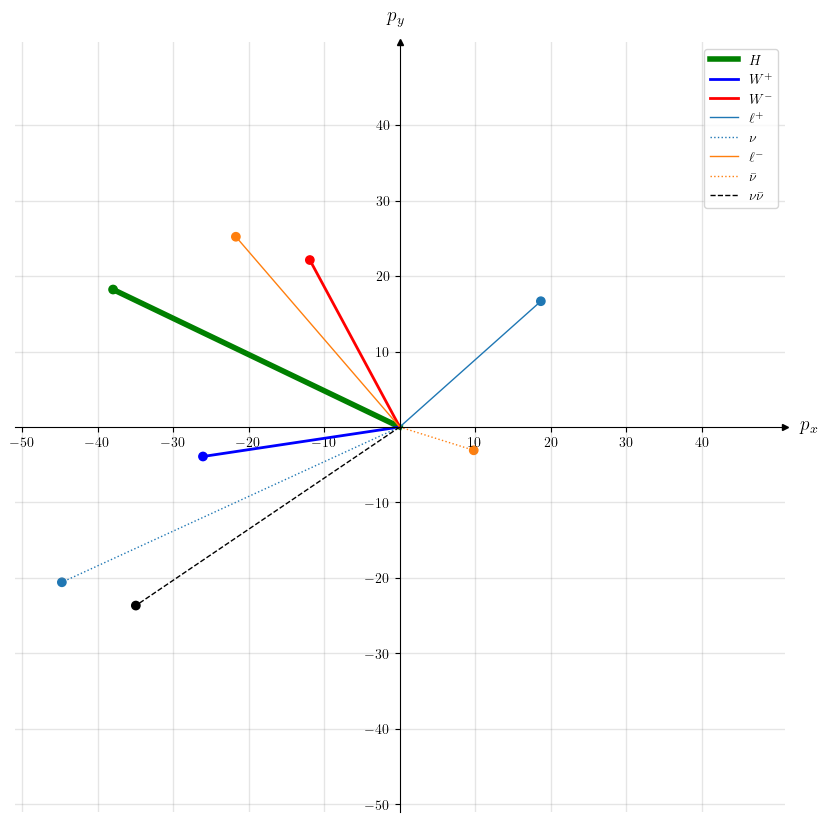

In [67]:
# Enter x and y coordinates of points and colors
#xs = [0, 2, -3, -1.5]
#ys = [0, 3, 1, -2.5]
evtid = np.random.choice(len(NeutrinoP['px']))
#xs = [NeutrinoP['px'][evtid],NeutrinoM['px'][evtid],MET['px'][evtid],LeptonP['px'][evtid],LeptonM['px'][evtid],diLepton['px'][evtid]]
#ys = [NeutrinoP['py'][evtid],NeutrinoM['py'][evtid],MET['py'][evtid],LeptonP['py'][evtid],LeptonM['py'][evtid],diLepton['py'][evtid]]
p = np.array([True,True ,False,True ,True ,False,False])
m = np.array([True,False,True ,False,False,True ,True ])
xs = np.array([1*Higgs['px'][evtid],WBosonP['px'][evtid],WBosonM['px'][evtid],LeptonP['px'][evtid],NeutrinoP['px'][evtid],LeptonM['px'][evtid],NeutrinoM['px'][evtid],MET['px'][evtid]])#,MET['px'][evtid],,diLepton['px'][evtid]]
ys = np.array([1*Higgs['py'][evtid],WBosonP['py'][evtid],WBosonM['py'][evtid],LeptonP['py'][evtid],NeutrinoP['py'][evtid],LeptonM['py'][evtid],NeutrinoM['py'][evtid],MET['py'][evtid]])#,MET['px'][evtid],,diLepton['px'][evtid]]
xy = [r'$H$',r'$W^+$',r'$W^-$',r'$\ell^+$',r'$\nu$',r'$\ell^-$',r'$\bar\nu$',r'$\nu\bar{\nu}$']
colors = ['g','b','r','C0','C0','C1','C1','k']
lines = ['solid','solid','solid','solid','dotted','solid','dotted','dashed']
weights = [4,2,2,1,1,1,1,1]
# Select length of axes and the space between tick labels
#xmin, xmax, ymin, ymax = -100, 100, -100, 100
#R1 = max(np.abs(np.sum(xs[p])),np.abs(np.sum(xs[m])))
#R2 = max(np.abs(np.sum(ys[p])),np.abs(np.sum(ys[m])))
#S1 = 10*(R1//10 + 1)
#S2 = 10*(R2//10 + 1)
div = 10 #scale
#R = (max(R1,R2)//div+ 1)*div # round to the nearest int*En
R = np.max(np.abs([xs,ys]))
R = (R//div + 1)*div
S = 1
xmin, xmax, ymin, ymax = -S*R,S*R,-S*R,S*R
ticks_frequency = S*div#(2*R)/div #tick step size

# Plot points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(xs, ys, c=colors)
# Draw lines connecting points to axes
i=0
vertex = [(0,0),(0,0),(0,0),(xs[1],ys[1]),(xs[1],ys[1]),(xs[2],ys[2]),(xs[2],ys[2])]
for x, y, c in zip(xs, ys, colors):
    #ax.plot([x, x], [0, y], c=c, ls='--', lw=1.5, alpha=0.5)
    #ax.plot([0, x], [y, y], c=c, ls='--', lw=1.5, alpha=0.5)
    ax.plot([vertex[0][0], x], [vertex[0][1], y], c=c, ls=lines[i],lw = weights[i],label = xy[i])
    i = i+1

# Set identical scales for both axes
ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create 'x' and 'y' labels placed at the end of the axes
ax.set_xlabel(r'$p_x$', size=14, labelpad=-24, x=1.03)
ax.set_ylabel(r'$p_y$', size=14, labelpad=-21, y=1.02, rotation=0)

# Create custom major ticks to determine position of tick labels
x_ticks = np.arange(xmin, xmax, ticks_frequency)
y_ticks = np.arange(ymin, ymax, ticks_frequency)

# Create minor ticks placed at each integer to enable drawing of minor grid
# lines: note that this has no effect in this example with ticks_frequency=1
#ax.set_xticks(np.arange(xmin, xmax+1), minor=False)
#ax.set_yticks(np.arange(ymin, ymax+1), minor=False)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

#ax.set_xticks()
#ax.set_yticks()
# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
plt.legend()
plt.show()

4.701216309 -7.597030762
-42.703148438 -42.703148438
-1.0166513361665925 -1.6024424511247053 -2.619093787291298 -1.309546893645649
-1.5043067289789973 -0.7521533644894987


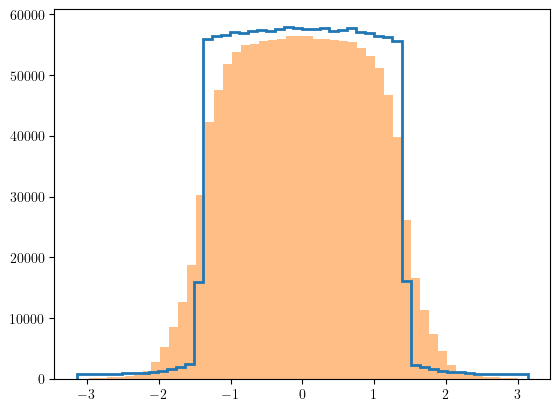

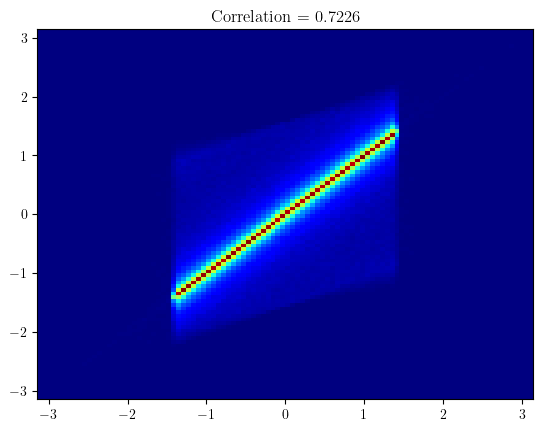

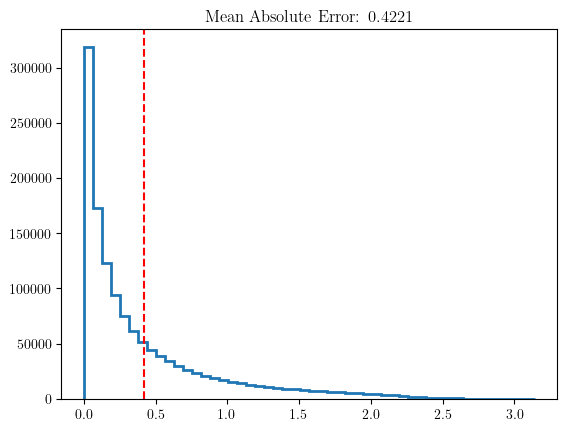

In [55]:
print(xs[4],ys[4])
print(ys[6],ys[6])
a = (np.arctan2(ys[4],xs[4]))
b = (np.arctan2(ys[6],xs[6]))
print(a,b,a+b,(a+b)/2)
print(diNeutrino['phi'][evtid],diNeutrino['phi'][evtid]/2)
cut = np.where(np.abs(MET['phi'])< (np.pi * 0.45), True, False )
a = NeutrinoP['phi'][cut]
b = NeutrinoM['phi'][cut]
c = (a+b)*0.5
plt.hist(diNeutrino['phi'][cut],bins=50,histtype='step',lw=2)
plt.hist((a+b)/2,bins=50,histtype='bar',alpha=0.5)    
plt.show()
plt.hist2d(diNeutrino['phi'][cut],(a+b)/2,bins=[100,100],range=[[-np.pi,np.pi],[-np.pi,np.pi]],cmap='jet',vmin=10)
plt.title("Correlation = {:.4f}".format(np.corrcoef(diNeutrino['phi'][cut],(a+b)/2)[0,1]))
plt.show()
d = np.abs((c - diNeutrino['phi'][cut]))
plt.hist(d,bins=50,histtype='step',lw=2,range=[0,np.pi])
plt.axvline(np.mean(d),ls='dashed',c='r')
plt.title('Mean Absolute Error: {:.4f}'.format(np.mean(d)))
plt.show()


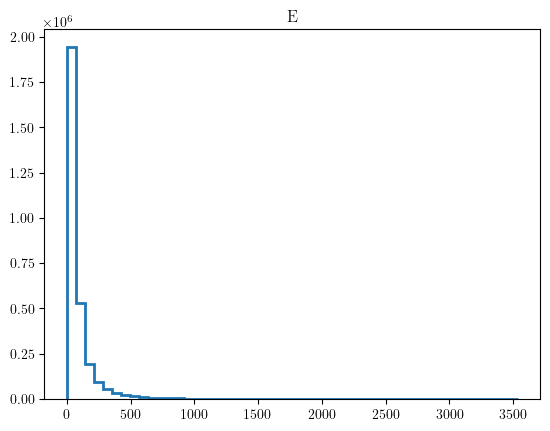

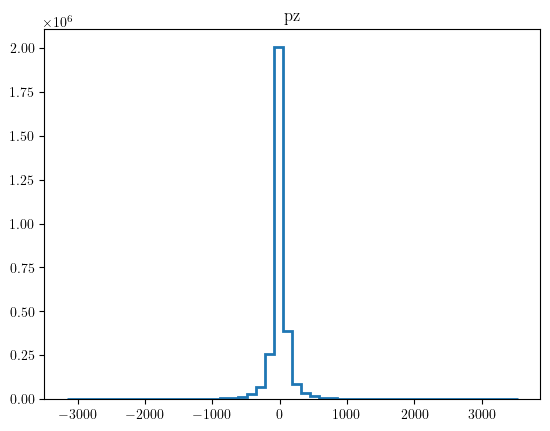

In [48]:
quick_hist(NeutrinoP,'E')
quick_hist(NeutrinoP,'pz')

# MET Kinematics

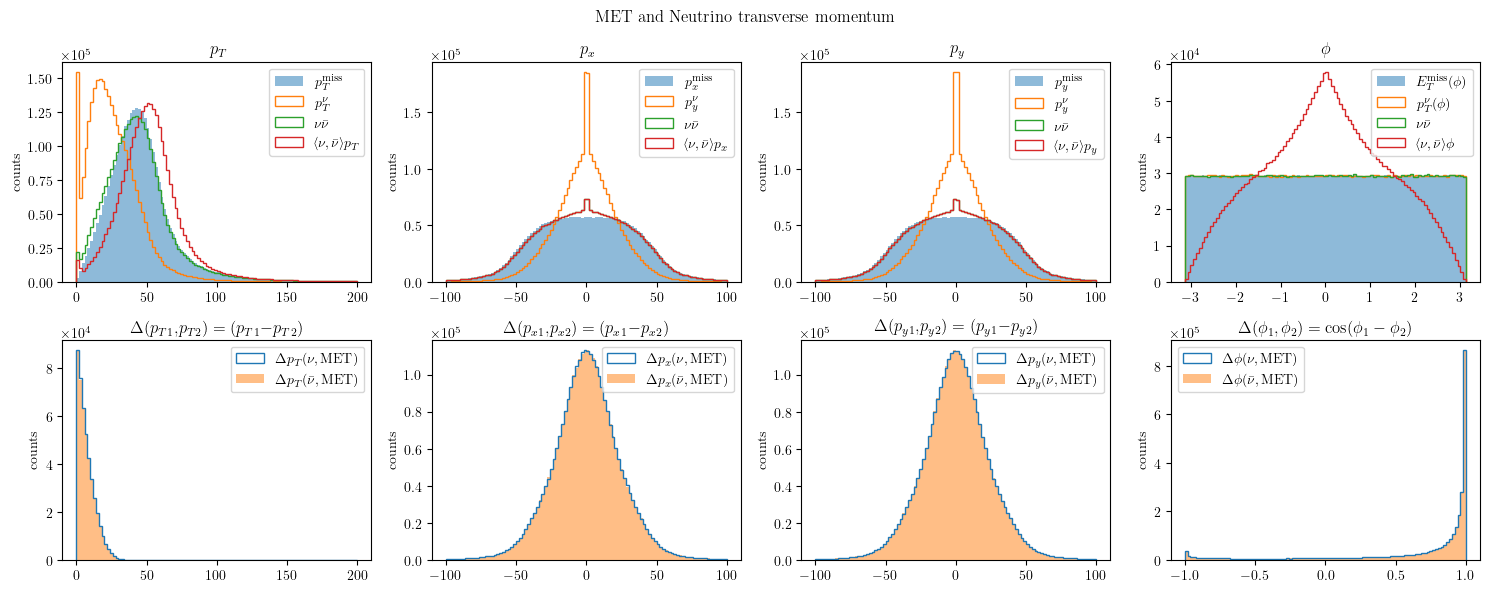

In [88]:
plt.style.use("default")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(15,6),tight_layout=True)
ax = ax.flatten()
plt.suptitle("MET and Neutrino transverse momentum")
DF_label = ['pt','px','py','phi']
x_label = [r'$p_T$',r'$p_x$',r'$p_y$',r'$\phi$']
x_axis = np.array([[0,200],[-100,100],[-100,100],[-np.pi,np.pi]])
nu_label  = [r"$p_T^\nu$",r"$p_y^\nu$",r"$p_y^\nu$",r"$p_T^\nu(\phi)$"]
met_label = [r"$p_T^\mathrm{miss}$",r"$p_x^\mathrm{miss}$",r"$p_y^\mathrm{miss}$",r"$E_T^\mathrm{miss}(\phi)$"]
for i in range(4):
    ax[i].hist(MET[DF_label[i]],bins=100,range=x_axis[i],histtype='bar',alpha=0.5,label=[met_label[i]])
    ax[i].hist(NeutrinoP[DF_label[i]],bins=100,range=x_axis[i],histtype='step',label=[ nu_label[i]])
    ax[i].hist(diNeutrino[DF_label[i]],bins=100,range=x_axis[i],histtype='step',label=r'$\nu\bar\nu$')
 
    if i ==3:
        ax[i].hist((NeutrinoP[DF_label[i]]+NeutrinoM[DF_label[i]])*0.5,bins=100,range=x_axis[i],histtype='step',label=r'$\langle\nu,\bar\nu\rangle$'+x_label[i])
    else:
        ax[i].hist((NeutrinoP[DF_label[i]]+NeutrinoM[DF_label[i]]),bins=100,range=x_axis[i],histtype='step',label=r'$\langle\nu,\bar\nu\rangle$'+x_label[i])

    diff_p = (NeutrinoP[DF_label[i]]-MET[DF_label[i]])
    diff_m = (NeutrinoM[DF_label[i]]-MET[DF_label[i]])
    ax[i].set_title(x_label[i])
    ax[i+4].set_title(r"$\Delta($"+x_label[i]+r'$_1,$'+x_label[i]+r'$_2) = ($'+x_label[i]+r'$_1-$'+x_label[i]+r'$_2)$')
    if i == 3: 
        diff_p = np.cos(NeutrinoP[DF_label[i]] - MET[DF_label[i]])
        diff_m = np.cos(NeutrinoM[DF_label[i]] - MET[DF_label[i]])
        ax[i+4].set_title(r"$\Delta(\phi_1,\phi_2) = \cos(\phi_1 - \phi_2)$") 
    ax[i+4].hist(diff_p,bins=100,range=[-1,1] if i==3 else x_axis[i],histtype='step',label = r'$\Delta$'+x_label[i]+r'$(\nu,\mathrm{MET})$')
    ax[i+4].hist(diff_m,bins=100,range=[-1,1] if i==3 else x_axis[i],histtype='bar',alpha=0.5,label = r'$\Delta$'+x_label[i]+r'$(\bar\nu,\mathrm{MET})$')


for i in range(8):
    ax[i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i].set_ylabel("counts")
    ax[i].legend()


plt.show()

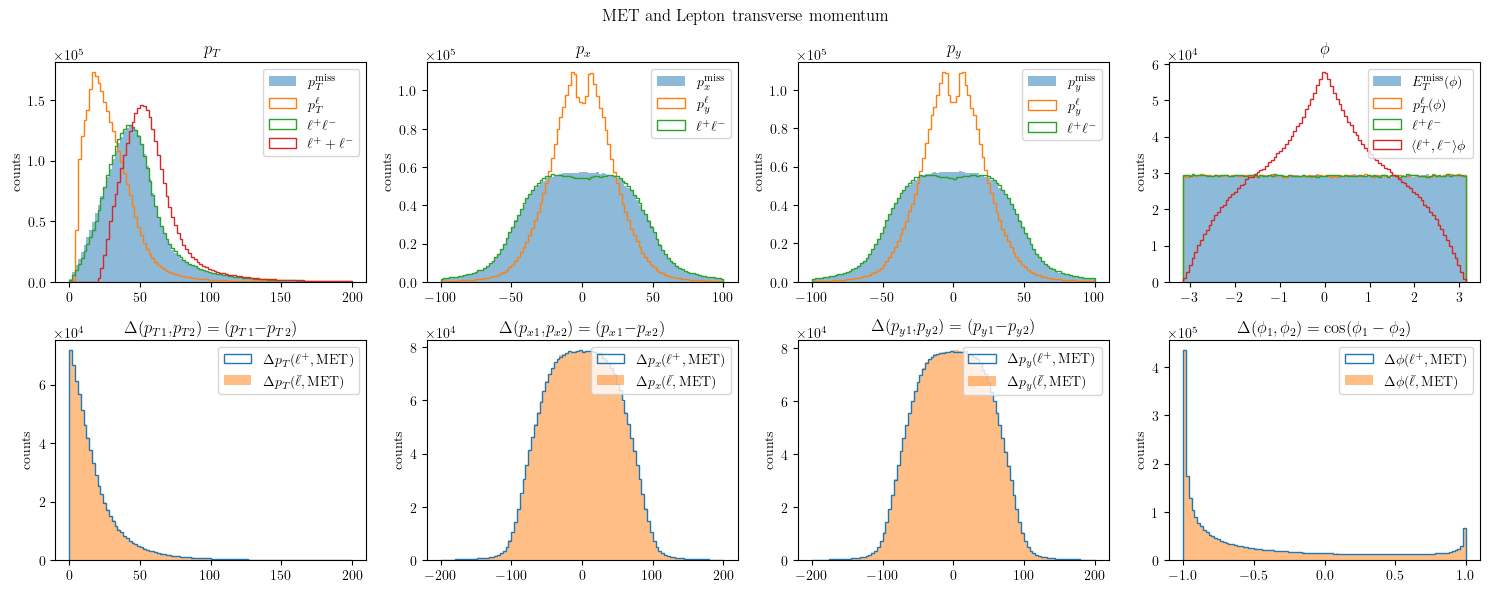

In [105]:
plt.style.use("default")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(15,6),tight_layout=True)
ax = ax.flatten()
DF_label = ['pt','px','py','phi']
x_label = [r'$p_T$',r'$p_x$',r'$p_y$',r'$\phi$']
x_axis = np.array([[0,200],[-100,100],[-100,100],[-np.pi,np.pi],\
                   [0,200],[-200,200],[-200,200],[-np.pi,np.pi]])
lep_label  = [r"$p_T^\ell$",r"$p_y^\ell$",r"$p_y^\ell$",r"$p_T^\ell(\phi)$"]
met_label = [r"$p_T^\mathrm{miss}$",r"$p_x^\mathrm{miss}$",r"$p_y^\mathrm{miss}$",r"$E_T^\mathrm{miss}(\phi)$"]
plt.suptitle("MET and Lepton transverse momentum")
for i in range(4):
    ax[i].hist(MET[DF_label[i]],bins=100,range=x_axis[i],histtype='bar',alpha=0.5,label=[met_label[i]])
    ax[i].hist(LeptonP[DF_label[i]],bins=100,range=x_axis[i],histtype='step',label=[ lep_label[i]])
    ax[i].hist(diLepton[DF_label[i]],bins=100,range=x_axis[i],histtype='step',label=r'$\ell^+\ell^-$')
 
    if i ==3:
        ax[i].hist((LeptonP[DF_label[i]]+LeptonM[DF_label[i]])*0.5,bins=100,range=x_axis[i],histtype='step',label=r'$\langle\ell^+,\ell^-\rangle$'+x_label[i])
    elif i ==0:
        ax[i].hist((LeptonP[DF_label[i]]+LeptonM[DF_label[i]]),bins=100,range=x_axis[i],histtype='step',label=r'$\ell^+ + \ell^-$')

    diff_p = (LeptonP[DF_label[i]]-MET[DF_label[i]])
    diff_m = (LeptonM[DF_label[i]]-MET[DF_label[i]])
    ax[i].set_title(x_label[i])
    ax[i+4].set_title(r"$\Delta($"+x_label[i]+r'$_1,$'+x_label[i]+r'$_2) = ($'+x_label[i]+r'$_1-$'+x_label[i]+r'$_2)$')
    if i == 3: 
        diff_p = np.cos(LeptonP[DF_label[i]] - MET[DF_label[i]])
        diff_m = np.cos(LeptonM[DF_label[i]] - MET[DF_label[i]])
        ax[i+4].set_title(r"$\Delta(\phi_1,\phi_2) = \cos(\phi_1 - \phi_2)$") 
    ax[i+4].hist(diff_p,bins=100,range=[-1,1] if i==3 else x_axis[i+4],histtype='step',label = r'$\Delta$'+x_label[i]+r'$(\ell^+,\mathrm{MET})$')
    ax[i+4].hist(diff_m,bins=100,range=[-1,1] if i==3 else x_axis[i+4],histtype='bar',alpha=0.5,label = r'$\Delta$'+x_label[i]+r'$(\bar\ell,\mathrm{MET})$')


for i in range(8):
    ax[i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i].set_ylabel("counts")
    ax[i].legend()


plt.show()

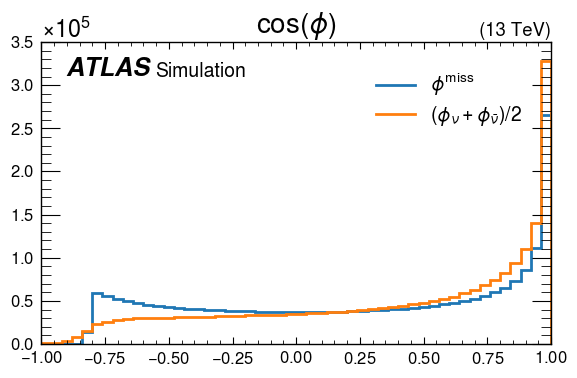

In [35]:
plt.style.use("default")
plt.style.use(hep.style.ATLAS)
fig = plt.figure(figsize=(6,4),tight_layout=True)
hep.atlas.label(loc=1)
i=3
a = np.where(np.abs(MET[DF_label[i]]) < 0.8*np.pi,True,False)
plt.title(r"$\cos(\phi)$",fontsize=20)
met_phi, met_phi_bin = np.histogram(np.cos(MET[DF_label[i]][a]),bins =50,range=[-1,1])#,histtype='step',label = 'MET')
nu_phi,nu_phi_bin = np.histogram(np.cos((NeutrinoM[DF_label[i]][a]+NeutrinoP[DF_label[i]][a])*0.5),bins = 50,range=[-1,1])#,histtype='step',label=r'$\langle\nu,\bar\nu\rangle$')
hep.histplot(met_phi,met_phi_bin,lw=2,label=r'$\phi^\mathrm{miss}$')
hep.histplot(nu_phi,nu_phi_bin,lw=2,label=r'$(\phi_\nu + \phi_\bar{\nu})/2$')
plt.tick_params(axis="both",labelsize=12,pad=5)

plt.legend()
plt.show()

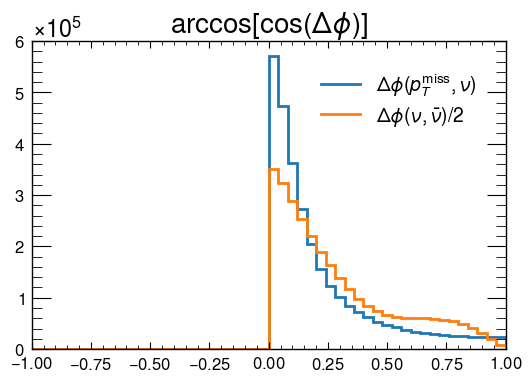

In [84]:
plt.style.use("default")
plt.style.use(hep.style.ATLAS)
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(6,4))#,tight_layout=True)
#hep.atlas.label(loc=1,fontsize=12)
i=3
axes.set_title(r'$\arccos[\cos(\Delta\phi)]$',fontsize=20)
a = np.where(np.abs(MET[DF_label[i]]) > 0*np.pi,True,False)
#axes.set_title(r"",fontsize=16)
dPhi, dPhi_bin = np.histogram(np.arccos(np.cos(NeutrinoP[DF_label[i]][a] - MET[DF_label[i]][a]))/np.pi,bins =50,range=[-1,1])#,histtype='step',label = 'MET')
hep.histplot(dPhi,dPhi_bin,lw=2,ax=axes,label=r'$\Delta\phi(p_T^\mathrm{miss},\nu)$')
#axes.set_title(r"",fontsize=16)
dPhi_nu, dPhi_nu_bin = np.histogram(np.arccos(np.cos((NeutrinoP[DF_label[i]][a] - NeutrinoM[DF_label[i]][a])/2))/np.pi,bins =50,range=[-1,1])#,histtype='step',label = 'MET')
hep.histplot(dPhi_nu,dPhi_nu_bin,lw=2,ax=axes,label=r'$\Delta\phi(\nu,\bar{\nu})/2$')
for i in [axes]:
    #i.set_xlabel(r"[$\pi$ Rads]",fontsize=12)
    i.tick_params(axis="both",labelsize=12,pad=5)
plt.legend()
plt.show()


## Pearson Correlation Coefficient

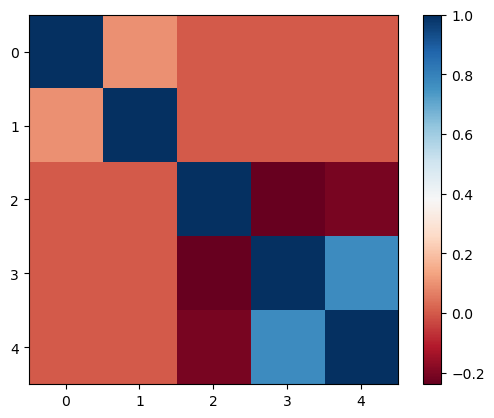

In [65]:
plt.style.use("default")
c = np.corrcoef([np.cos(LeptonP['phi'] - LeptonM['phi']),
                 np.cos(NeutrinoP['phi'] - NeutrinoM['phi']),
                 LeptonP['px'],
                 NeutrinoP['px'],
                 MET['px'] ])
 
plt.imshow(c,cmap='RdBu')
plt.colorbar()

## Correlation Plots

No handles with labels found to put in legend.


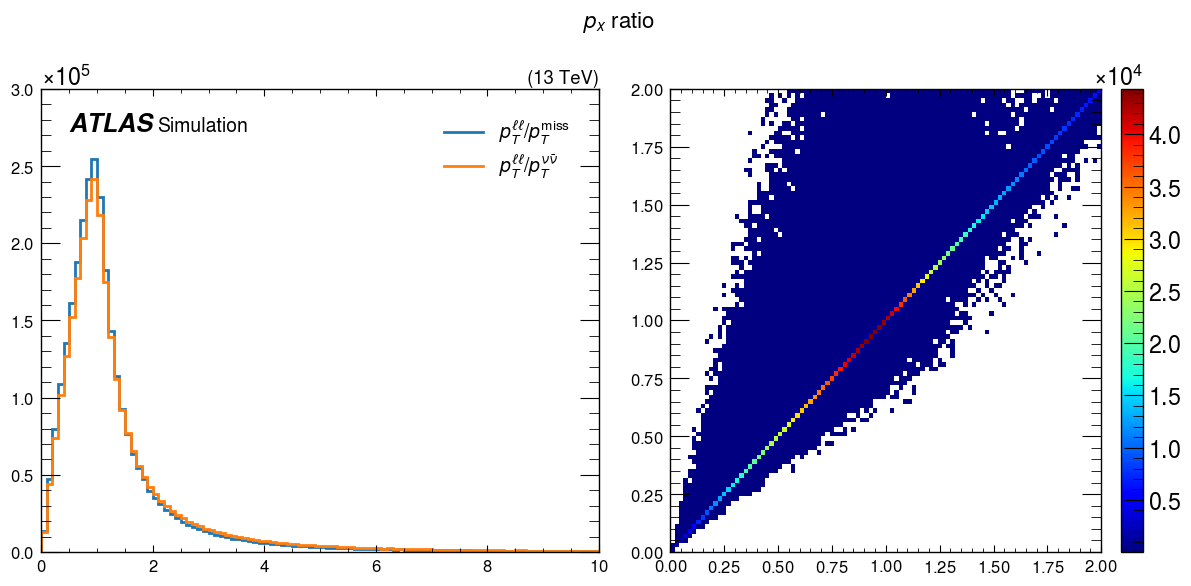

In [166]:
plt.style.use("default")
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb2
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),tight_layout=True)
hep.atlas.label(loc=1,ax=ax[0])
i=3
a = np.where(np.abs(MET[DF_label[i]]) < 0.8*np.pi,True,False)
plt.suptitle(r"$p_T$ ratio",fontsize=16)
ll_met,ll_met_bin = np.histogram(diLepton['pt']/MET['pt'],bins=100,range=[0,10])
ll_vv, ll_vv_bin = np.histogram(diLepton['pt']/diNeutrino['pt'],bins=100,range=[0,10])
met_vv, met_vv_x, met_vv_y = np.histogram2d(diLepton['pt']/MET['pt'],diLepton['pt']/diNeutrino['pt'],range=[[0,2],[0,2]],bins=[100,100])
hep.histplot([ll_met,ll_vv],ll_met_bin,lw=2,label=[r'$p_T^{\ell\ell}/p_T^\mathrm{miss}$',r'$p_T^{\ell\ell}/p_T^{\nu\bar\nu}$'],ax=ax[0])
hep.hist2dplot(met_vv,xbins = met_vv_x,ybins = met_vv_y,cbar=True,cmin=10,cbarextend=True,flow=None,cbarsize="5%",cmap=my_cmap,ax=ax[1])
#plt.ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-3,3))
for i in ax:
    i.tick_params(axis="both",labelsize=12,pad=5)
    i.legend()
plt.show()

No handles with labels found to put in legend.


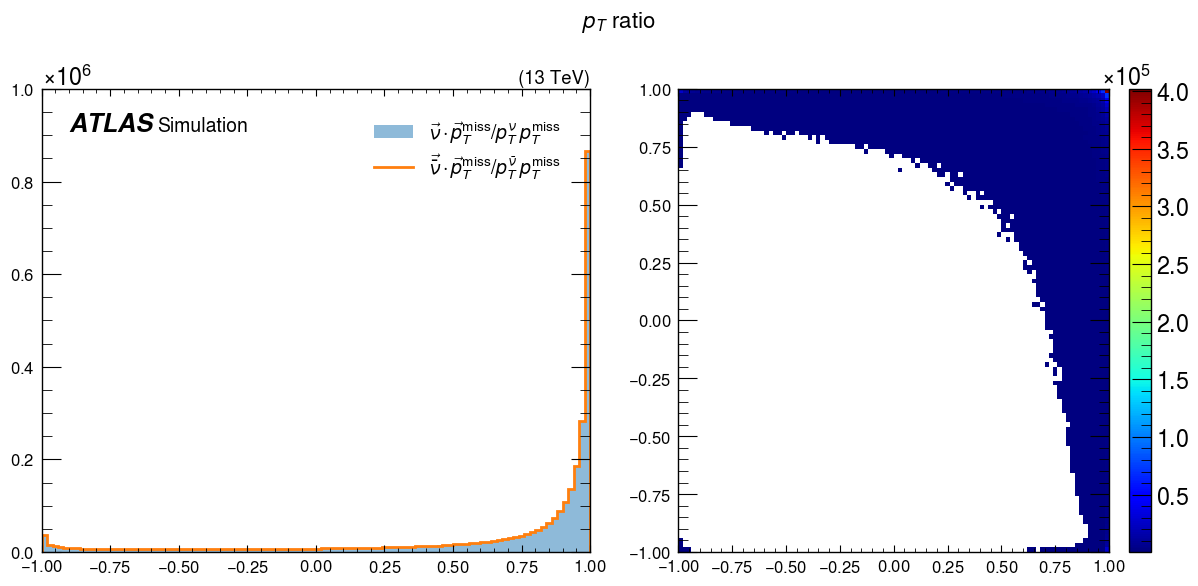

In [53]:
plt.style.use("default")
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb2
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),tight_layout=True)
hep.atlas.label(loc=1,ax=ax[0])
#a = np.where(np.abs(MET[DF_label[i]]) < 0.8*np.pi,True,False)
plt.suptitle(r"$p_T$ ratio",fontsize=16)
a = (NeutrinoP['px']*MET['px'] + NeutrinoP['py']*MET['py'])/(NeutrinoP['pt']*MET['pt'])
b = (NeutrinoM['px']*MET['px'] + NeutrinoM['py']*MET['py'])/(NeutrinoM['pt']*MET['pt'])
lp_met,lp_met_bin = np.histogram(a,bins=100,range=[-1,1])
lm_met,lm_met_bin = np.histogram(b,bins=100,range=[-1,1])
lp_lm, lp_lm_x, lp_lm_y = np.histogram2d(a,b,range=[[-1,1],[-1,1]],bins=[100,100])
hep.histplot(lp_met,lp_met_bin,lw=2,histtype='fill',alpha=0.5,label=r'$\vec{\nu}\cdot\vec{p}_T^\mathrm{miss}/p_T^\nu\:p_T^\mathrm{miss}$',ax=ax[0])
hep.histplot(lm_met,lm_met_bin,lw=2,histtype='step',label=r'$\vec{\bar{\nu}}\cdot\vec{p}_T^\mathrm{miss}/p_T^\bar{\nu}\:p_T^\mathrm{miss}$',ax=ax[0])
hep.hist2dplot(lp_lm,xbins = lp_lm_x,ybins = lp_lm_y,cbar=True,cmin=100,cbarextend=True,flow=None,cbarsize="5%",cmap=my_cmap,ax=ax[1])
#plt.ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-3,3))
for i in ax:
    i.tick_params(axis="both",labelsize=12,pad=5)
    i.legend()
plt.show()

No handles with labels found to put in legend.


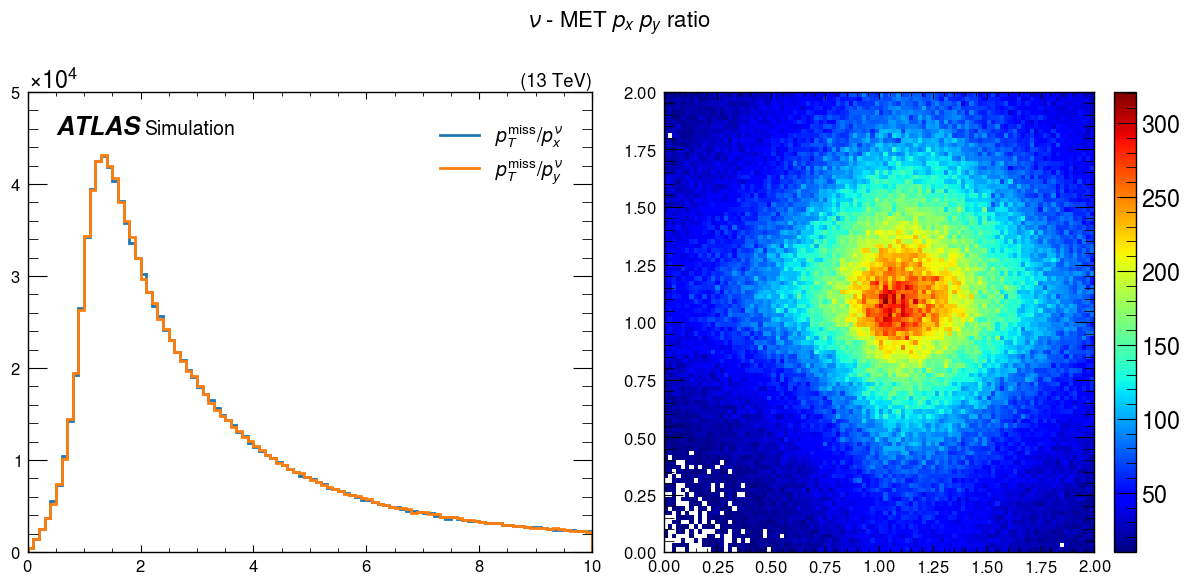

In [79]:
plt.style.use("default")
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb2
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),tight_layout=True)
hep.atlas.label(loc=1,ax=ax[0])
i=3
a = np.where(np.abs(MET[DF_label[i]]) < 0.8*np.pi,True,False)
plt.suptitle(r"$\nu$ - MET $p_x$ $p_y$ ratio",fontsize=16)
met_vx,met_vx_bin = np.histogram(MET['pt']/NeutrinoP['px'],bins=100,range=[0,10])
met_vy,met_vy_bin = np.histogram(MET['pt']/NeutrinoP['py'],bins=100,range=[0,10])
met_vv,met_vv_x,met_vv_y = np.histogram2d(MET['px']/NeutrinoP['px'],MET['py']/NeutrinoP['py'],range=[[0,2],[0,2]],bins=[100,100])
hep.histplot([met_vx,met_vy],met_vx_bin,lw=2,label=[r'$p_T^\mathrm{miss}/p_x^\nu$',r'$p_T^\mathrm{miss}/p_y^\nu$'],ax=ax[0])
hep.hist2dplot(met_vv,xbins = met_vv_x,ybins = met_vv_y,cbar=True,cmin=10,cbarextend=True,flow=None,cbarsize="5%",cmap=my_cmap,ax=ax[1])
#plt.ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-3,3))
for i in ax:
    i.tick_params(axis="both",labelsize=12,pad=5)
    i.legend()
plt.show()

No handles with labels found to put in legend.


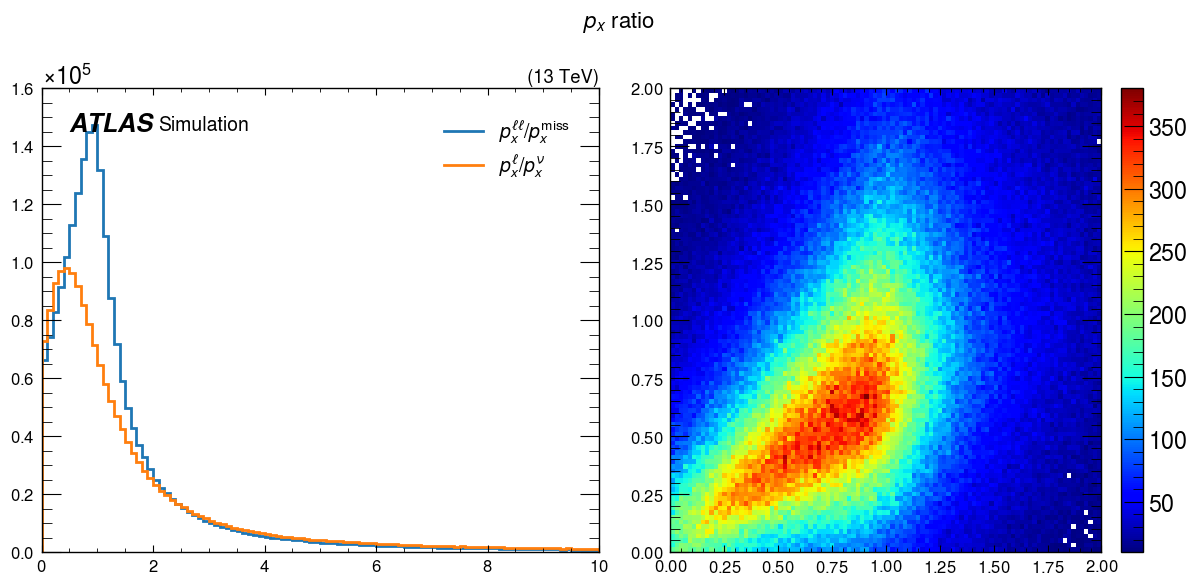

In [171]:
plt.style.use("default")
plt.style.use(hep.style.ATLAS)  # or ATLAS/LHCb2
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6),tight_layout=True)
hep.atlas.label(loc=1,ax=ax[0])
i=3
a = np.where(np.abs(MET[DF_label[i]]) < 0.8*np.pi,True,False)
plt.suptitle(r"$p_x$ ratio",fontsize=16)
ll_met,ll_met_bin = np.histogram(diLep_inv['px']NeutrinoP['px'],bins=100,range=[0,10])
lp_vp, lp_vp_bin = np.histogram(LepP_inv['px']/NeutrinoP['px'],bins=100,range=[0,10])
met_vv, met_vv_x, met_vv_y = np.histogram2d(diLep_inv['px']/MET['px'],LepP_inv['px']/NeutrinoP['px'],range=[[0,2],[0,2]],bins=[100,100])
hep.histplot([ll_met,lp_vp],ll_met_bin,lw=2,label=[r'$p_x^{\ell\ell}/p_x^\mathrm{miss}$',r'$p_x^{\ell}/p_x^{\nu}$'],ax=ax[0])
hep.hist2dplot(met_vv,xbins = met_vv_x,ybins = met_vv_y,cbar=True,cmin=10,cbarextend=True,flow=None,cbarsize="5%",cmap=my_cmap,ax=ax[1])
#plt.ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-3,3))
for i in ax:
    i.tick_params(axis="both",labelsize=12,pad=5)
    i.legend()
plt.show()

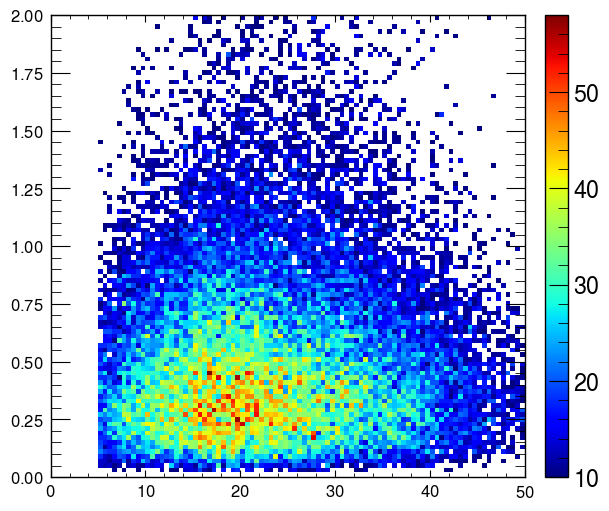

In [75]:
plt.style.use("default")
plt.style.use(hep.style.ATLAS) 
fig,axes = plt.subplots(figsize=(6,6))#,tight_layout=True)
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
i=0
dPhi = ((NeutrinoP[DF_label[i]] - MET[DF_label[i]])/np.pi)

H,x_bin, y_bin = np.histogram2d(LeptonP['pt'],NeutrinoM['pt'],#np.cos(LeptonP['phi'] - LeptonM['phi']),\
                                #np.cos(NeutrinoP['phi'] - NeutrinoM['phi']),\
                                bins=[100,100],range=[[0,50],[0,2]])#range=[[-np.pi,np.pi],[-np.pi,np.pi]])
hep.hist2dplot(H,xbins=x_bin,ybins=y_bin,cbar=True,cmin=10,cbarextend=True,flow=None,cbarsize="5%",cmap=my_cmap)
axes.tick_params(axis="both",labelsize=12,pad=5)
plt.show()

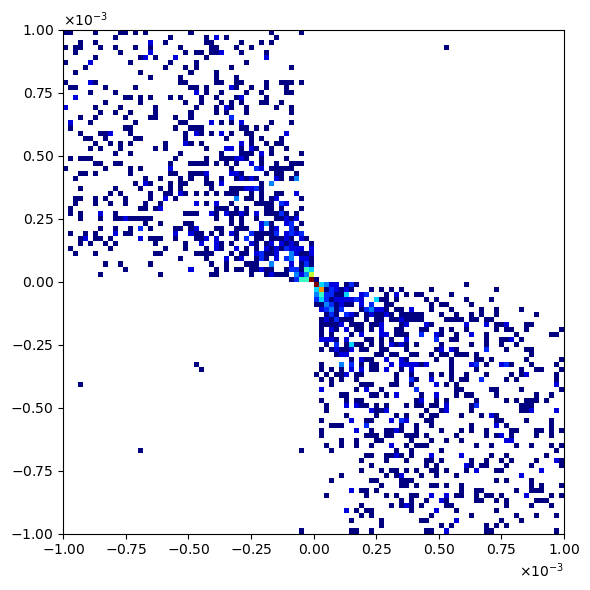

In [42]:
fig = plt.figure(figsize=(6,6),tight_layout=True)
i = 3
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
plt.hist2d((NeutrinoP[DF_label[i]] - MET[DF_label[i]]),\
           (NeutrinoM[DF_label[i]] - MET[DF_label[i]]),\
           bins = [100,100],range=[[-1E-3,1E-3],[-1E-3,1E-3]],vmin=1,cmap=my_cmap)
plt.ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-3,3))

plt.show()

### Neutrino Vs MET

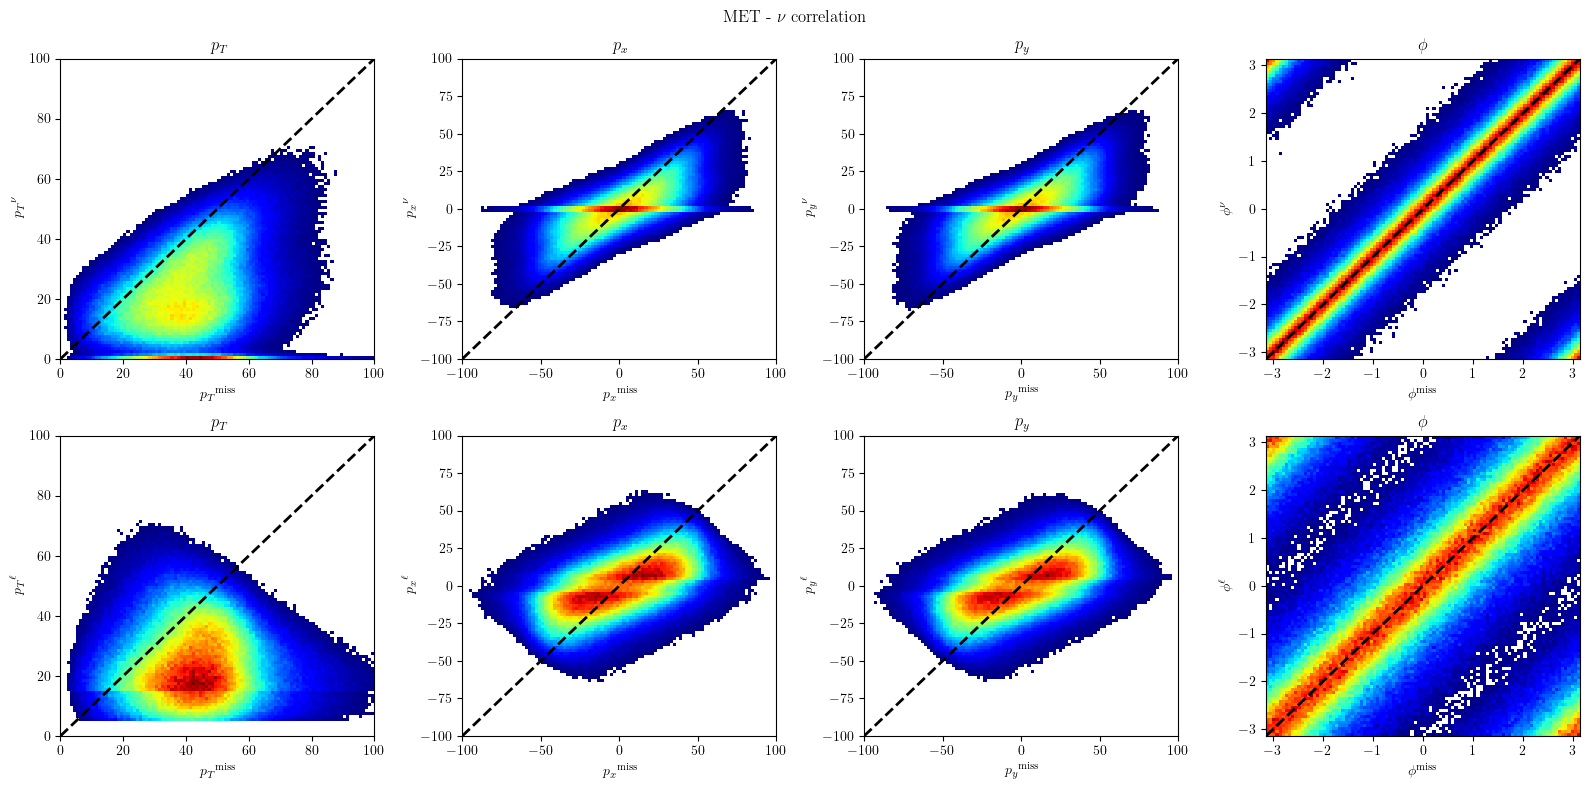

In [5]:
plt.style.use("default")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8),tight_layout=True)
ax = ax.flatten()

my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
plt.suptitle(r"MET - $\nu$ correlation")
DF_label = ['pt','px','py','phi']
x_label = [r'$p_T$',r'$p_x$',r'$p_y$',r'$\phi$']
x_axis = np.array([[0,200],[-100,100],[-100,100],[-np.pi,np.pi],\
                   [0,200],[-200,200],[-200,200],[-np.pi,np.pi]])
lep_label  = [r"$p_T^\ell$",r"$p_y^\ell$",r"$p_y^\ell$",r"$p_T^\ell(\phi)$"]
met_label = [r"$p_T^\mathrm{miss}$",r"$p_x^\mathrm{miss}$",r"$p_y^\mathrm{miss}$",r"$E_T^\mathrm{miss}(\phi)$"]
xy_range = [[[0,100],[0,100]],\
            [[-100,100],[-100,100]],\
            [[-100,100],[-100,100]],\
            [[-np.pi,np.pi],[-np.pi,np.pi]]]
for i in range(4):
    ax[i].hist2d(MET[DF_label[i]],NeutrinoP[DF_label[i]],bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
    ax[i+4].hist2d(MET[DF_label[i]],LepP_inv[DF_label[i]],bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
for i in range(8):
    ax[i].set_title(x_label[i%4])
    ax[i].set_ylabel(x_label[i%4]+r'$^\nu$') if i<4 else ax[i].set_ylabel(x_label[i%4]+r'$^\ell$')
    ax[i].set_xlabel(x_label[i%4]+r'$^\mathrm{miss}$')
    ax[i].plot([xy_range[i%4][0][0],xy_range[i%4][0][1]],[xy_range[i%4][1][0],xy_range[i%4][1][1]],ls='dashed',c='k',lw=2)
    ax[i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))

plt.show()

### Neutrino vs anti-Neutrino

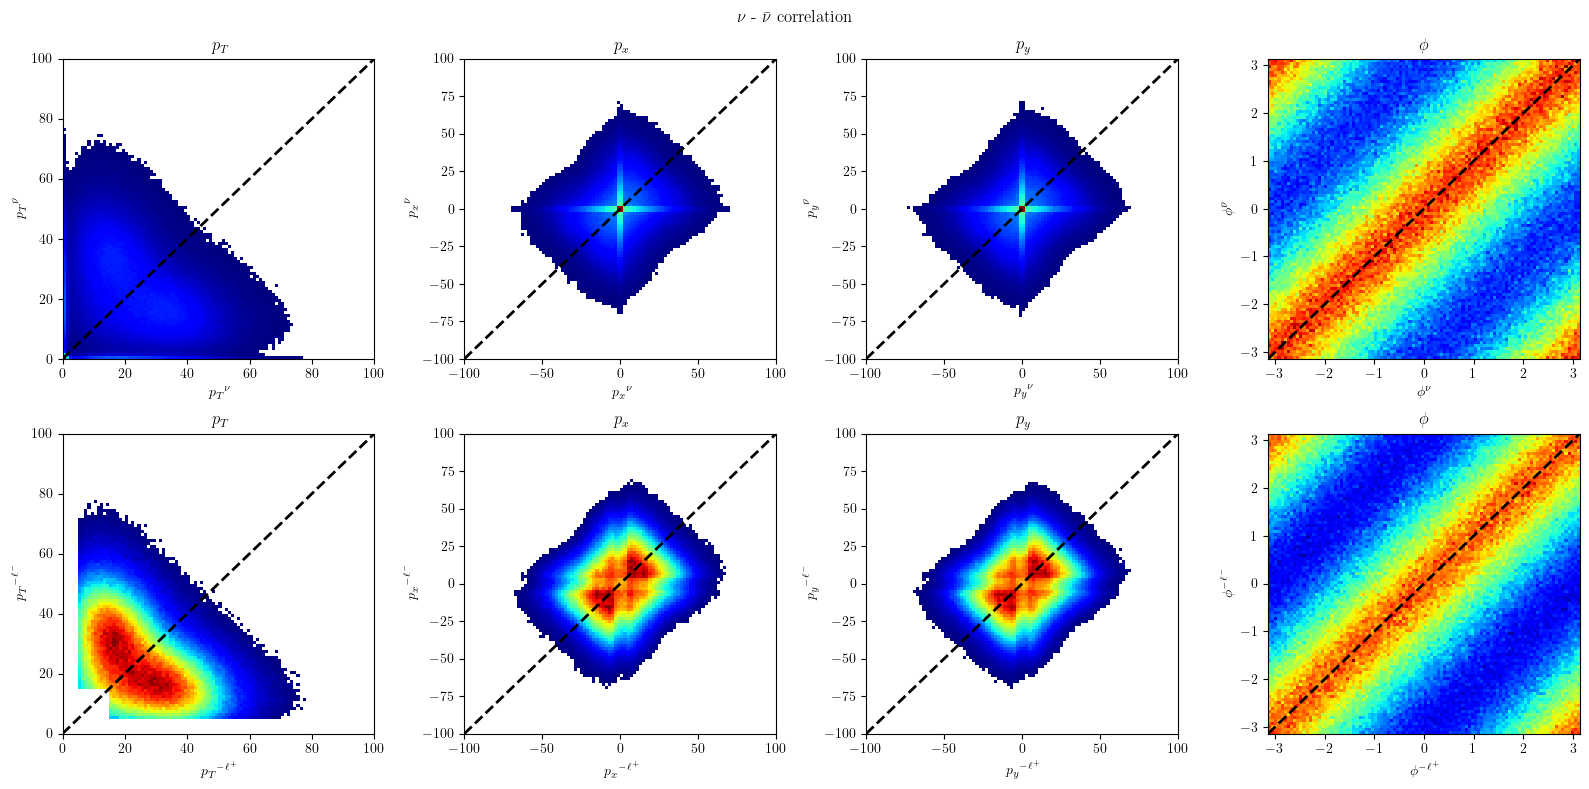

In [132]:
'''
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(16,4),tight_layout=True)
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
plt.suptitle(r"$\nu$ - $\bar\nu$ correlation")

xy_range = [[[0,100],[0,100]],\
            [[-100,100],[-100,100]],\
            [[-100,100],[-100,100]],\
            [[-np.pi,np.pi],[-np.pi,np.pi]]]
for i in range(4):
    ax[i].set_title(x_label[i])
    ax[i].hist2d(NeutrinoP[DF_label[i]],NeutrinoM[DF_label[i]],bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
    ax[i].set_ylabel(x_label[i]+r'$^\bar\nu$')
    ax[i].set_xlabel(x_label[i]+r'$^\nu$')
    ax[i].plot([xy_range[i][0][0],xy_range[i][0][1]],[xy_range[i][1][0],xy_range[i][1][1]],ls='dashed',c='k',lw=2)
    ax[i].ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-4,4))

plt.show()
'''

plt.style.use("default")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8),tight_layout=True)
ax = ax.flatten()

my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
plt.suptitle(r"$\nu$ - $\bar\nu$ correlation")

xy_range = [[[0,100],[0,100]],\
            [[-100,100],[-100,100]],\
            [[-100,100],[-100,100]],\
            [[-np.pi,np.pi],[-np.pi,np.pi]]]
for i in range(4):
    ax[i].hist2d(NeutrinoP[DF_label[i]],NeutrinoM[DF_label[i]],bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
    ax[i+4].hist2d(LepP_inv[DF_label[i]],LepM_inv[DF_label[i]],bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
    ax[i].set_ylabel(x_label[i%4]+r'$^{\bar{\nu}}$')
    ax[i].set_xlabel(x_label[i%4]+r'$^{\nu}$')
    ax[i+4].set_ylabel(x_label[i%4]+r'$^{-\ell^-}$')
    ax[i+4].set_xlabel(x_label[i%4]+r'$^{-\ell^+}$')
for i in range(8):
    ax[i].set_title(x_label[i%4])

    ax[i].plot([xy_range[i%4][0][0],xy_range[i%4][0][1]],[xy_range[i%4][1][0],xy_range[i%4][1][1]],ls='dashed',c='k',lw=2)
    ax[i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))

plt.show()

### Neutrino - MET vs anti-Neutrino - MET

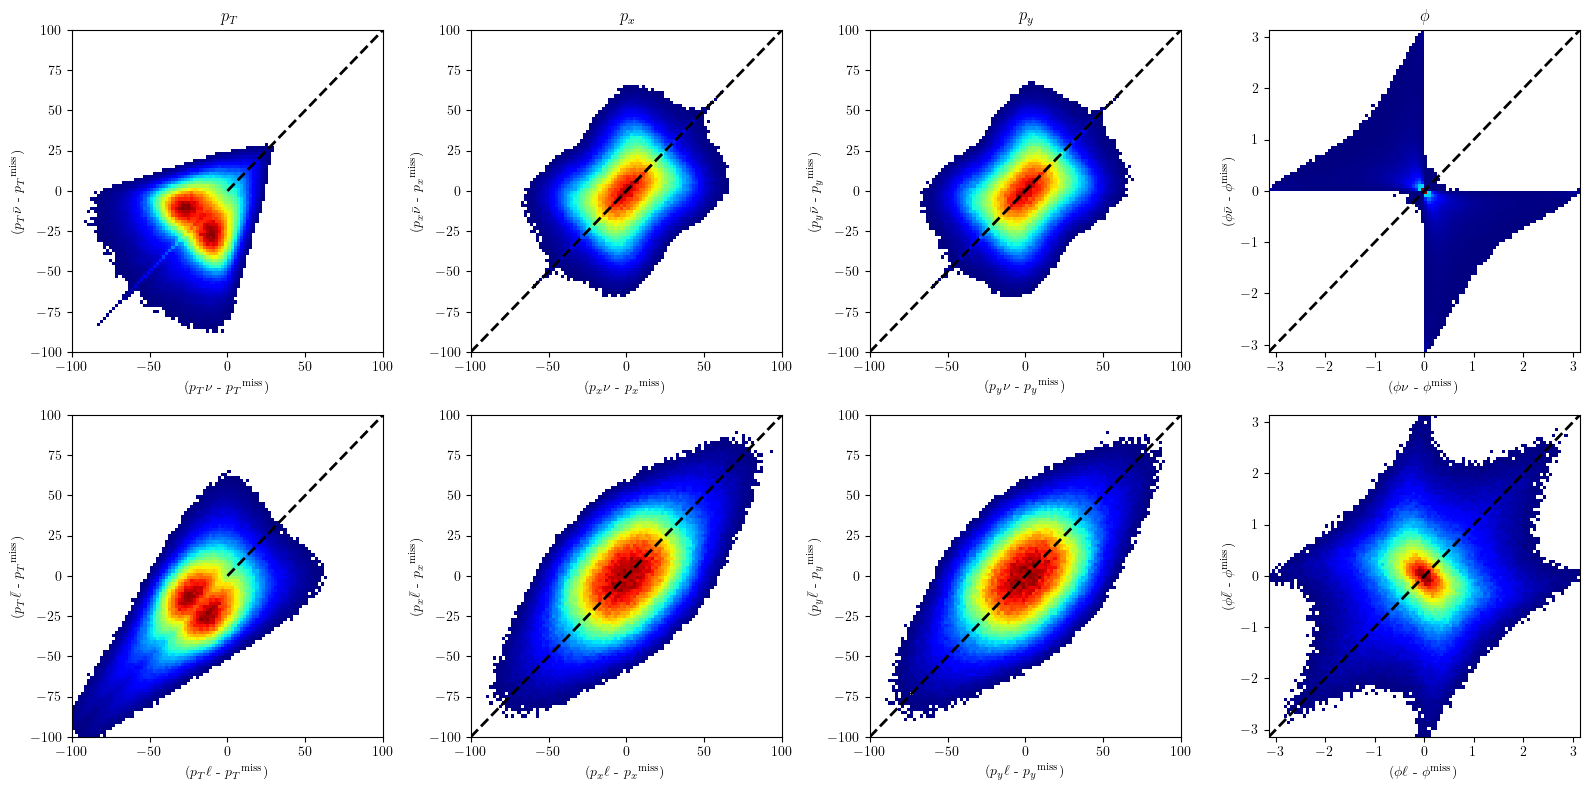

In [139]:
plt.style.use("default")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8),tight_layout=True)
ax = ax.flatten()
for i in range(4):
    ax[i].set_title(x_label[i])
    if i==3:
        ax[i].hist2d((NeutrinoP[DF_label[i]] - MET[DF_label[i]]), (NeutrinoM[DF_label[i]] - MET[DF_label[i]]),bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
        ax[i+4].hist2d((LepP_inv[DF_label[i]] - MET[DF_label[i]]), (LepM_inv[DF_label[i]] - MET[DF_label[i]]),bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)

    else:
        ax[i].hist2d((NeutrinoP[DF_label[i]] - MET[DF_label[i]]), (NeutrinoM[DF_label[i]] - MET[DF_label[i]]),bins=[100,100],range=[[-100,100],[-100,100]],cmap=my_cmap,vmin=100)
        ax[i+4].hist2d((LepP_inv[DF_label[i]] - MET[DF_label[i]]), (LepM_inv[DF_label[i]] - MET[DF_label[i]]),bins=[100,100],range=[[-100,100],[-100,100]],cmap=my_cmap,vmin=100)
    ax[i].set_ylabel('('+x_label[i%4]+r'$\bar\nu$ - '+x_label[i%4]+r'$^\mathrm{miss})$')#+x_label[i%4]+r'$^\mathrm{miss}$')
    ax[i].set_xlabel('('+x_label[i%4]+r'$\nu$ - '+x_label[i%4]+r'$^\mathrm{miss})$')#+x_label[i%4]+r'$^\mathrm{miss}$')
    ax[i+4].set_ylabel('('+x_label[i%4]+r'$\bar\ell$ - '+x_label[i%4]+r'$^\mathrm{miss})$')#+x_label[i%4]+r'$^\mathrm{miss}$')
    ax[i+4].set_xlabel('('+x_label[i%4]+r'$\ell$ - '+x_label[i%4]+r'$^\mathrm{miss})$')#+x_label[i%4]+r'$^\mathrm{miss}$')
for i in range(8):
    ax[i].plot([xy_range[i%4][0][0],xy_range[i%4][0][1]],[xy_range[i%4][1][0],xy_range[i%4][1][1]],ls='dashed',c='k',lw=2)
    ax[i].ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-3,3))

plt.show()

### Neutrino momentum sum/ phi average vs MET momentum/phi

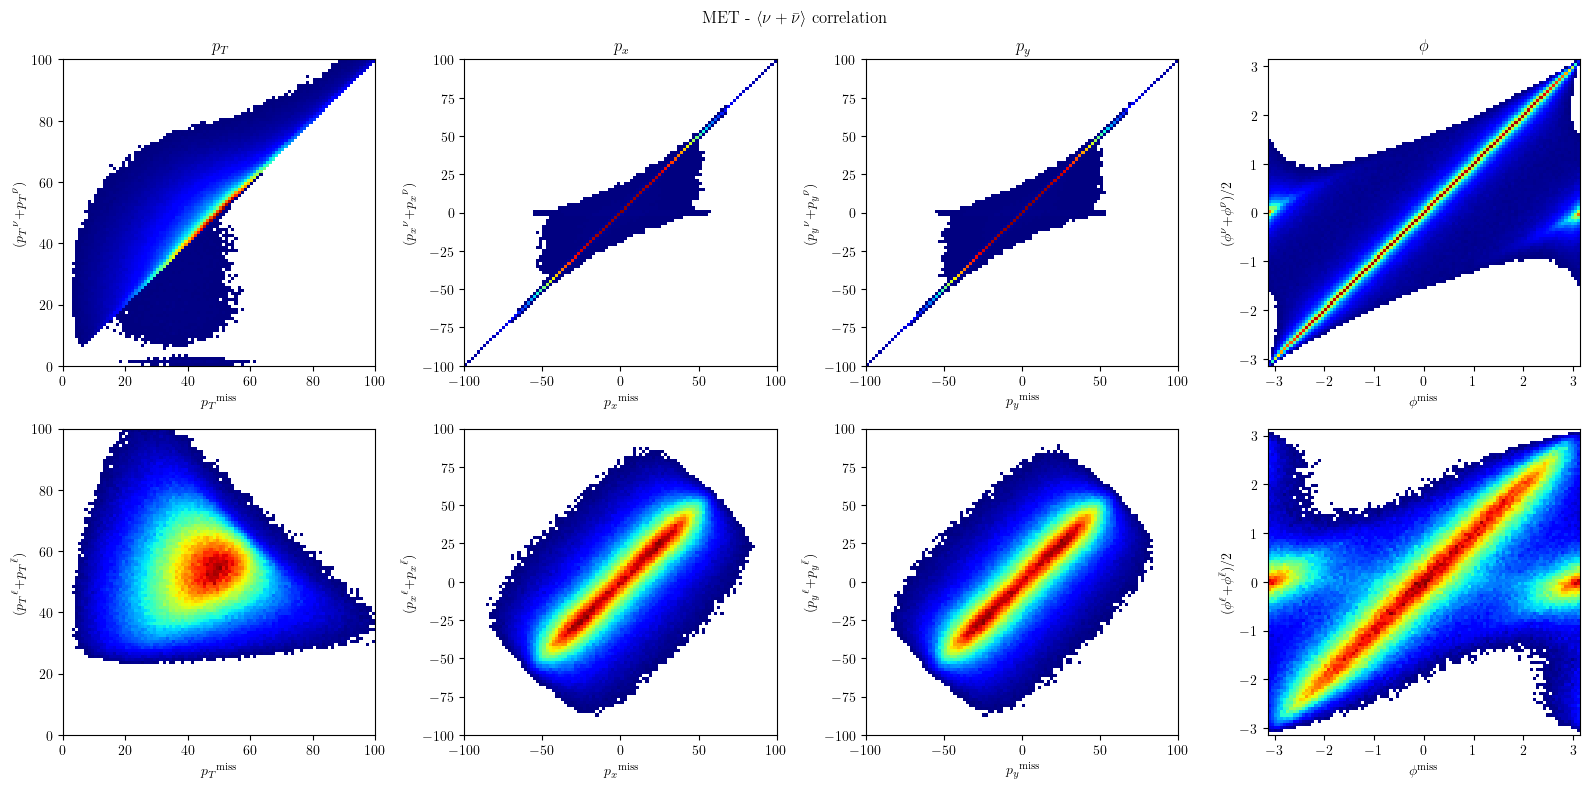

In [30]:
plt.style.use("default")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8),tight_layout=True)
ax = ax.flatten()
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
plt.suptitle(r"MET - $\langle\nu + \bar\nu \rangle$ correlation")
xy_range = [[[0,100],[0,100]],\
            [[-100,100],[-100,100]],\
            [[-100,100],[-100,100]],\
            [[-np.pi,np.pi],[-np.pi,np.pi]]]

for i in range(4):
    ax[i].set_title(x_label[i])
    if i ==3:
        ax[i].hist2d((MET[DF_label[i]]), (NeutrinoP[DF_label[i]]+NeutrinoM[DF_label[i]])*0.5,bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
        ax[i+4].hist2d((MET[DF_label[i]]), (LepP_inv[DF_label[i]]+LepM_inv[DF_label[i]])*0.5,bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
        ax[i].set_ylabel('('+x_label[i]+r'$^{\nu}$+'+x_label[i]+r'$^{\bar\nu}$)/2')
        ax[i+4].set_ylabel('('+x_label[i]+r'$^{\ell}$+'+x_label[i]+r'$^{\bar\ell}$)/2')
    else:
        ax[i].hist2d((MET[DF_label[i]]), (NeutrinoP[DF_label[i]]+NeutrinoM[DF_label[i]]),bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
        ax[i+4].hist2d((MET[DF_label[i]]), (LepP_inv[DF_label[i]]+LepM_inv[DF_label[i]]),bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
        ax[i].set_ylabel('('+x_label[i]+r'$^{\nu}$+'+x_label[i]+r'$^{\bar\nu}$)')
        ax[i+4].set_ylabel('('+x_label[i]+r'$^{\ell}$+'+x_label[i]+r'$^{\bar\ell}$)')
    ax[i].set_xlabel(x_label[i]+r'$^\mathrm{miss}$')
    #ax[i].plot([xy_range[i][0][0],xy_range[i][0][1]],[xy_range[i][1][0],xy_range[i][1][1]],ls='dashed',c='k',lw=2)
    ax[i].ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i+4].set_xlabel(x_label[i]+r'$^\mathrm{miss}$')
    #ax[i].plot([xy_range[i][0][0],xy_range[i][0][1]],[xy_range[i][1][0],xy_range[i][1][1]],ls='dashed',c='k',lw=2)
    ax[i+4].ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-4,4))

plt.show()

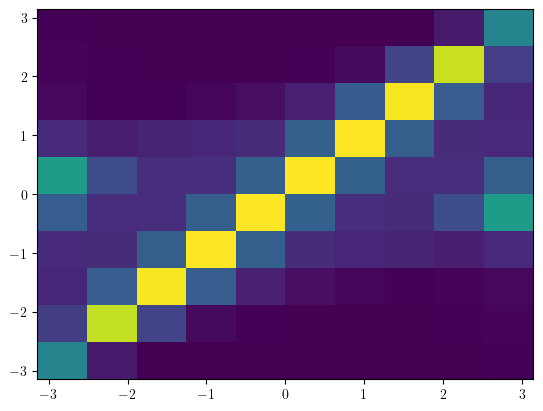

In [33]:
plt.hist2d((MET[DF_label[i]]), (NeutrinoP[DF_label[i]]+NeutrinoM[DF_label[i]])*0.5)
plt.show()

### di-Neutrino vs MET

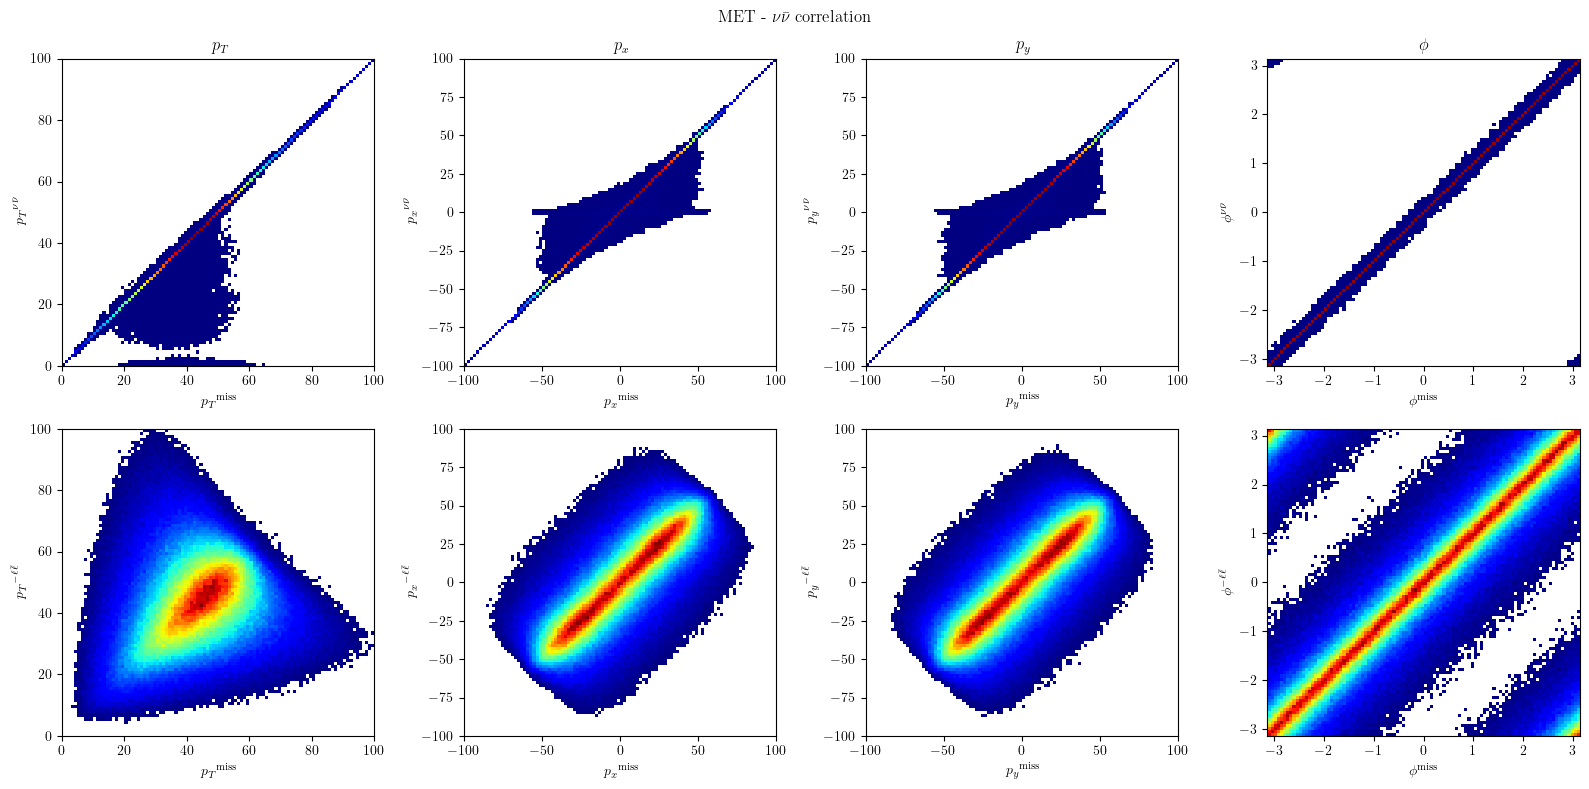

In [52]:
plt.style.use("default")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(16,8),tight_layout=True)
ax = ax.flatten()
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
plt.suptitle(r"MET - $\nu\bar\nu$ correlation")

xy_range = [[[0,100],[0,100]],\
            [[-100,100],[-100,100]],\
            [[-100,100],[-100,100]],\
            [[-np.pi,np.pi],[-np.pi,np.pi]]]
for i in range(4):
    ax[i].set_title(x_label[i])
    ax[i].hist2d(MET[DF_label[i]],diNeutrino[DF_label[i]],bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
    ax[i].set_ylabel(x_label[i]+r'$^{\nu\bar\nu}$')
    ax[i].set_xlabel(x_label[i]+r'$^\mathrm{miss}$')
    #ax[i].plot([xy_range[i][0][0],xy_range[i][0][1]],[xy_range[i][1][0],xy_range[i][1][1]],ls='dashed',c='k',lw=2)
    ax[i].ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i].set_title(x_label[i])
    ax[i+4].hist2d(MET[DF_label[i]],diLep_inv[DF_label[i]],bins=[100,100],range=xy_range[i],cmap=my_cmap,vmin=100)
    ax[i+4].set_ylabel(x_label[i]+r'$^{-\ell\bar\ell}$')
    ax[i+4].set_xlabel(x_label[i]+r'$^\mathrm{miss}$')
    #ax[i].plot([xy_range[i][0][0],xy_range[i][0][1]],[xy_range[i][1][0],xy_range[i][1][1]],ls='dashed',c='k',lw=2)
    ax[i+4].ticklabel_format(axis='both', style='sci', useMathText=True, scilimits=(-4,4))

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols=figsize=(4,4),tight_layout=True)
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
ax.hist2d(MET['px'],NeutrinoP['pt'],bins=[100,100],range=[[0,100],[0,100]],cmap=my_cmap,vmin=1)
ax.set_ylabel(r'$p_T^\nu$')
ax.set_xlabel(r'$p_T^\mathrm{miss}$')
ax.plot([0,100],[0,100],ls='dashed',c='k',lw=2)
plt.show()

In [49]:
i = 3
a = np.argmin(np.cos(NeutrinoP[DF_label[i]] - MET[DF_label[i]]))
print(NeutrinoP[DF_label[3]][a], MET[DF_label[3]][a])
print(NeutrinoP[DF_label[1]][a], MET[DF_label[1]][a])
print(NeutrinoP[DF_label[2]][a], MET[DF_label[2]][a])

2.256071 -0.885524
-0.265128632 26.441868439000004
0.324347229 -32.348025817999996


In [42]:
def quick_hist(DF,label):
    plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    plt.hist(DF[label], bins = 50, histtype='step', lw=2)
    plt.title(label)
    plt.show()

# Modified neutrino weighting method for diNeutrino system reconstruction

In the two lepton, two neutrino final state, we only have knowledge of the leptons and missing energy.  
Here is a demonstration of neutrino weighting method, a prototype technique for reconstructing the di-neutrino system  
* Di-lepton system $p_\ell = (E_\ell, \vec{p}_\ell)$
* Di-neutrino system $p_\nu = (E_\nu, \vec{p}_\nu)$  

To solve for the four-vector components, we must make some assumptions and set constraints.
* The parent particle (Higgs boson) is set to have a mass of 125 GeV
* The transverse momentum of the di-neutrino system is set to be the missing transverse energy
    * $p_T \equiv E_T^\text{miss}$
* Parameters to scan
    * di-neutrino pseudorapidity $\hat\eta$
        * angle between di-neutrino system and lab frame beam axis  $\hat\theta$ 
    * di-neutrino invariant mass $\hat{m}_\nu$
$$
w_\nu = \exp[-(\hat{p}_x - p_x^\text{miss})^2]\exp[-(\hat{p}_x - p_y^\text{miss})^2]
$$
$${m_H}^2 = (E_\ell + E_\nu)^2 - |\vec{p}_\ell + \vec{p}_\nu|^2 $$
1. ${E_\ell}^2 + 2E_\ell E_\nu + {E_\nu}^2 - (|\vec{p}_\ell|^2 + 2\vec{p}_\ell \cdot \vec{p}_\nu + |\vec{p}_\nu|^2 ) $
    * ${E_\ell}^2 - |\vec{p}_\ell|^2 + {E_\nu}^2 - |\vec{p}_\nu|^2 + 2(E_\ell E_\nu - \vec{p}_\ell\cdot\vec{p}_\nu)$
    * ${m_\ell}^2 + {\hat{m}_\nu}^2 + 2(E_\ell E_\nu - \vec{p}_\ell\cdot\vec{p}_\nu)$
3. $\hat{\eta} = -\ln[\tan(\hat\theta/2)] \leftrightarrow \hat{\theta} = 2\arctan[\exp(-\hat\eta)] $
4. $|\vec{p}_\nu| = p_T / \sin(\hat\theta) = p_T \cosh(\hat\eta) \to {E_\nu}^2 = [\underbrace{p_T / \sin(\hat\theta)}_{p_T \cosh(\hat\eta)}]^2 + {\hat{m}_\nu}^2$
    * $p_x^\nu = p_T \cos(\hat\phi)$
    * $p_y^\nu = p_T \sin(\hat\phi)$
    * $p_z^\nu = p_T / \tan(\hat\theta) = p_T \sinh(\hat\eta)$
5. $\vec{p}_\ell \cdot \vec{p}_\nu = p_x^\ell p_T \cos(\hat\phi) + p_y^\ell p_T \sin(\hat\phi) + p_z^\ell \underbrace{p_T /\tan(\hat\theta)}_{p_T \sinh(\hat\eta)} $


$$
\begin{gather}
{m_H}^2 = {m_\ell}^2 + {\hat{m}_\nu}^2 + 2[E_\ell F(\phi;\hat{\theta},\hat{m_\nu}) - G(\phi;\hat{\theta},\hat{m_\nu})] \\
F(\phi;\hat{\theta},\hat{m_\nu}) = \sqrt{[\underbrace{p_T / \sin(\hat\theta)}_{p_T \cosh(\hat\eta)}]^2  + {\hat{m}_\nu}^2} \\
G(\phi;\hat{\theta},\hat{m_\nu}) = p_x^\ell p_T \cos(\hat\phi) + p_y^\ell p_T \sin(\hat\phi) + p_z^\ell\underbrace{p_T /\tan(\hat\theta)}_{p_T \sinh(\hat\eta)}
\end{gather}
$$


## Alternate method
Weighting method uses two value estimates and solves for one unknown. The system is completely defined with the solved unknown, taking the estimates corresponding to the maximum weighted solution.  
The first method uses $\eta \: (\theta)$ and $m_{\nu\nu}$ as estimates, and solve for $\phi$.  
We may also try:  
1. estimate $\phi$, $m_{\nu\nu}$, and solve for $\eta \: (\theta)$
2. estimate $\eta \: (\theta)$, $\phi$, and solve for $m_{\nu\nu}$
    * minimize $\Delta R$ between estimation and truth value
    * compare $\hat{m}_{\nu\nu}$ with the truth distribution
    * Issue: the definition of weight is no longer determined by the deviation from missing transverse energy components



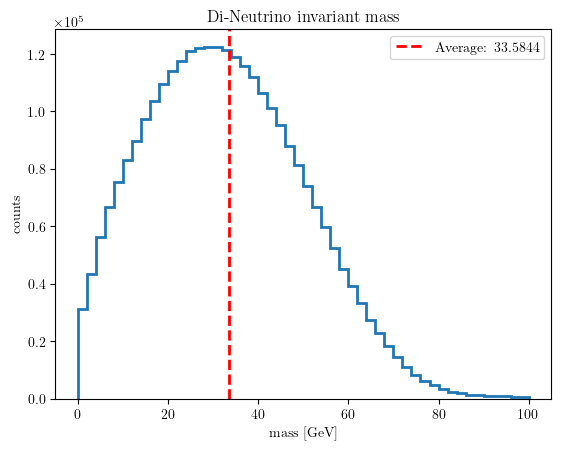

In [59]:
mvv = np.sqrt(diNeutrino['m2'][diNeutrino['m2']>0])
plt.title("Di-Neutrino invariant mass")
plt.hist( mvv, bins=50, histtype='step', lw=2, range = [0,100])
plt.axvline(np.mean(mvv),ls='dashed',lw=2,c='r',label = 'Average: {:.4f}'.format(np.mean(mvv)))
plt.xlabel("mass [GeV]")
plt.ylabel("counts")
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.legend()
plt.show()

In [123]:
'''
def F(theta, m):
    p = pT/np.sin(theta)
    return np.sqrt(p**2 + m**2)
def G(theta, phi):
    return lep_px*pT*np.cos(phi) + lep_py*pT*np.sin(phi) + lep_pz*pT/np.tan(theta)
'''

'''
def H(theta, pt, phi):
    p = pt/np.sin(theta)
    f = np.sqrt(p**2 + M**2)
    g = lep_px*pt*np.cos(phi) + lep_py*pt*np.sin(phi) + lep_pz*pt/np.tan(theta)
    return 125**2 - lep_m**2 - M**2 - 2*(lep_E*f - g)
'''

'\ndef H(theta, pt, phi):\n    p = pt/np.sin(theta)\n    f = np.sqrt(p**2 + M**2)\n    g = lep_px*pt*np.cos(phi) + lep_py*pt*np.sin(phi) + lep_pz*pt/np.tan(theta)\n    return 125**2 - lep_m**2 - M**2 - 2*(lep_E*f - g)\n'

In [97]:
a = sp.optimize.brentq(lambda k: 2*k - 4, -3,3,full_output=False)
type(a)

float

In [129]:
%%time
plots = []
for a in range(10):
    evt_id = np.random.choice(len(Higgs['E']))
    print(f'Event #{evt_id} selected')
    # Assumed constants
    mH = 125
    pT = MET['pt'][evt_id]
    px_stdev = np.std(MET['px'])
    py_stdev = np.std(MET['py'])
    # Missing transverse energy
    MET_x  =       MET['px' ][evt_id]
    MET_y  =       MET['py' ][evt_id]
    MET_phi=       MET['phi'][evt_id]
    # Lepton Measurements (Known kinetic variables)
    lep_px =   diLepton['px'][evt_id]
    lep_py =   diLepton['py'][evt_id]
    lep_pz =   diLepton['pz'][evt_id]
    lep_E  =   diLepton[ 'E'][evt_id]
    lep_m  = mv.inv_mass(lep_E, lep_px, lep_py, lep_pz)
    # Neutrino (Invisible) (Unknown kinematic variables)
    nu_E   = diNeutrino['E' ][evt_id]
    nu_px  = diNeutrino['px'][evt_id]
    nu_py  = diNeutrino['py'][evt_id]
    nu_pz  = diNeutrino['pz'][evt_id]
    nu_P   = mv.vec_mag(nu_px,nu_py,nu_pz)
    nu_m   = mv.inv_mass(nu_E,nu_px,nu_py,nu_pz)
    nu_pT  = np.sqrt(nu_px**2 + nu_py**2)
    nu_eta = np.arctanh(nu_pz/nu_P)
    nu_phi = np.arctan2(nu_py, nu_px)
    M = np.mean(mvv) # Mean value of truth di-neutrino mass distribution
    # Parameter to estimate (scan range)
    N_div = 1000
    #theta_est = np.linspace(0.0001,np.pi-0.0001,N_div)
    eta_est = np.linspace(-5,5,N_div)
    mass_est  = np.linspace(0.0001,100,N_div)
    phi_est = np.linspace(-np.pi,np.pi,N_div)
    #pT_est = np.linspace(0,200,N_div)
    def W(px,py):
        dx = (px - MET_x)/px_stdev
        dy = (py - MET_y)/py_stdev
        return np.exp(-1*dx**2)*np.exp(-1*dy**2)

    def H(eta, m, phi):
        #p = pT/np.sin(theta)
        p = pT*np.cosh(eta)
        f = np.sqrt(p**2 + m**2)
        #g = lep_px*(pT*np.cos(phi)) + lep_py*(pT*np.sin(phi)) + lep_pz*(pT/np.tan(theta))
        g = lep_px*(pT*np.cos(phi)) + lep_py*(pT*np.sin(phi)) + lep_pz*(pT*np.sinh(eta))
        return mH**2 - (lep_m**2 + m**2 + 2*(lep_E*f - g))
    xy = np.zeros((N_div,N_div))# coordinate array
    #for k, z in enumerate(mass_est):
    for i, x in enumerate(eta_est):
        for j, y in enumerate(mass_est):
            #p1 = np.argmax(H(x,y,phi_est))#H(eta mass phi)
            #p2 = np.argmin(H(x,y,phi_est))
            p1 = np.argmax(H(x,y,phi_est)) # Index to element of max value
            p2 = np.argmin(H(x,y,phi_est)) # Index to element of min value
            a = min(phi_est[p1],phi_est[p2]) # get input parameters of min value by index
            b = max(phi_est[p1],phi_est[p2]) # sort parameter estimate
            if (H(x,y,a)*H(x,y,b)) > 0:
                xy[i,j] = 0
            else:
                if (H(x,y,a)*H(x,y,b))<=0: # Interval [extrema(1), extrema(2)]
                    phi_hat = sp.optimize.brentq(lambda k : H(x,y,k),a,b,full_output=False)
                    x_hat = pT*np.cos(phi_hat)
                    y_hat = pT*np.sin(phi_hat)
                    tmp1 = W(x_hat, y_hat)
                    xy[i,j] = W(x_hat, y_hat)
                if (H(x,y,phi_est[0])*H(x,y,a))<=0: # Interval: [lower bound, extrema(1)] 
                    phi_hat = sp.optimize.brentq(lambda k : H(x,y,k),phi_est[0],a,full_output=False)
                    x_hat = pT*np.cos(phi_hat)
                    y_hat = pT*np.sin(phi_hat)
                    tmp2 = W(x_hat, y_hat)
                    xy[i,j] = xy[i,j] + tmp2
                if (H(x,y,b)*H(x,y,phi_est[-1]))<=0: # Interval: [extrema(2), upper bound]
                    phi_hat = sp.optimize.brentq(lambda k : H(x,y,k),b,phi_est[-1],full_output=False)
                    x_hat = pT*np.cos(phi_hat)
                    y_hat = pT*np.sin(phi_hat)
                    tmp3 = W(x_hat, y_hat)
                    xy[i,j] = xy[i,j] + tmp3
    plots.append(xy)

#sol = np.unravel_index(xy.argmax(), xy.shape)

Event #1987153 selected
Event #2858442 selected
Event #1685761 selected
Event #349375 selected
Event #1763616 selected
Event #1732120 selected
Event #2112931 selected
Event #1614488 selected
Event #578799 selected
Event #1869051 selected
CPU times: user 10min 48s, sys: 243 ms, total: 10min 48s
Wall time: 10min 47s


-1.3363363363363363 -0.9088291059934437
-1.2230767194048422 20.120000554009902


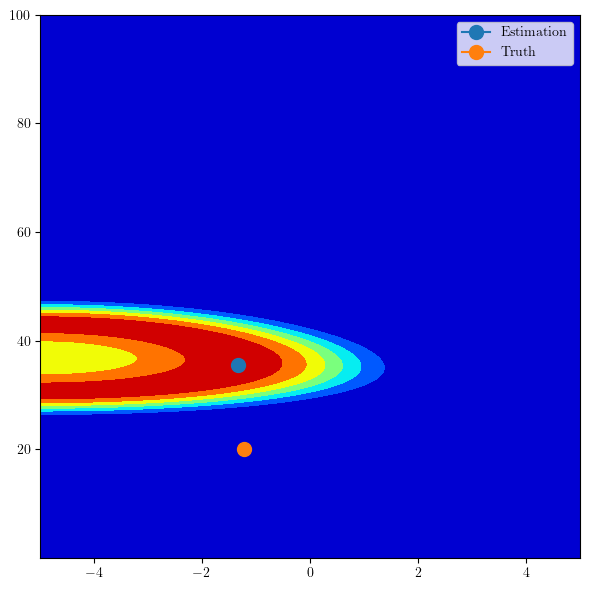

In [128]:
print(eta_est[sol[1]],phi_est[sol[0]])
print(nu_eta,nu_m)
xx, yy = np.meshgrid(eta_est, mass_est)
fig = plt.figure(figsize=(6,6))
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
#plt.title('Event #{}'.format(evt_id))
plt.contourf(xx,yy,xy,cmap = my_cmap, vmin = 0.001)
plt.plot(eta_est[sol[1]],mass_est[sol[0]],marker='o',markersize=10,label='Estimation')
plt.plot(nu_eta,nu_m,marker='o',markersize=10,c='C1',label='Truth')
plt.legend()
plt.tight_layout()
plt.show()

In [1]:
for i in range(1):
    th = np.random.choice(eta_est)
    mv_est = np.random.choice(mass_est)
    plt.plot(phi_est,H(th,mv_est,phi_est),\
         label=r'$\eta = ${:.4f}'.format(th)+'\n'+r'$m_\nu = ${:.4f}'.format(mv_est),\
         ls='none',marker='o',markersize=1)

    if (np.max(H(th,mv_est,phi_est))*np.min(H(th,mv_est,phi_est)))>=0:
        print("no root")
    else:
        p1 = np.argmax(H(th,mv_est,phi_est))
        p2 = np.argmin(H(th,mv_est,phi_est))
        a = min(phi_est[p1],phi_est[p2])
        b = max(phi_est[p1],phi_est[p2])
        phi_hat = sp.optimize.brentq(lambda k : H(th,mv_est,k),a,b, full_output=True)
        if phi_hat[-1].converged:
            print(phi_hat[0])
        else:
            print("Converged: ",phi_hat[-1].converged)
plt.legend()

plt.show()
for i in range(1):
    th = np.random.choice(eta_est)
    mv_est = np.random.choice(mass_est)
    plt.plot(phi_est,H(th,mv_est,phi_est),\
             label=r'$\eta = ${:.4f}'.format(th)+'\n'+r'$m_\nu = ${:.4f}'.format(mv_est),\
             ls='none',marker='o',markersize=1)
    #plt.plot(H(th,mass_est,phi_est),label=r'$\hat\theta = ${:.4f}'.format(th),ls='none',marker='o',markersize=1)
    #plt.plot(H(theta_est,mv_est,phi_est),label=r'$\hatm_\nu = ${:.4f}'.format(mv_est),ls='none',marker='o',markersize=1)
#plt.ylim([-10000,10000])
plt.legend()
plt.show()
for i in range(1):
    th = np.random.choice(eta_est)
    mv_est = np.random.choice(mass_est)
    p1 = np.argmax(H(th,mv_est,phi_est))
    p2 = np.argmin(H(th,mv_est,phi_est))
    if p1*p2 < 0:
        phi_hat = sp.optimize.root_scalar(lambda k : H(th,mv_est,k),\
                                          bracket=[min(phi_est[p1],phi_est[p2]),max(phi_est[p1],phi_est[p2])],\
                                          method='brentq')
        if phi_hat.converged: 
            print(phi_hat.root)
        else:
            print("Converged: ",phi_hat.converged)
    else:
        print("no root")

NameError: name 'np' is not defined

### Alternate Method For simultaneous reconstruction of each neutrino
Parametrize the Higgs Mass equation with two variables $\alpha$ and $\beta$, guess $p_z$ of the dineutrino system.
* Neutrino 1: 
    * $P^x_{\nu 1} \equiv \alpha P^x_\text{miss}$
    * $P^y_{\nu 1} \equiv \beta P^y_\text{miss}$
* Neutrino 2: 
    * $P^2_{\nu 2} = (1 - \alpha) P_x^\text{miss}$
    * $P^y_{\nu 2} = (1 - \beta ) P_y^\text{miss}$
* Impose W boson pole mass on one of the neutrino-lepton pair (here assigned to lepton/neutrino #1)
    * ${m_W}^2 = (E_{\nu 1} + E_{\ell 1})^2  - (\alpha P^x_\text{miss} + P^{x}_{\ell 1})^2 - (\beta P^y_\text{miss} + P^{y}_{\ell 1})^2 - (P^{z}_{\nu 1} + P^{z}_{\ell 1})^2$
    * ${m_W}^2 = ({E_{\nu 1} + E_{\ell 1}})^2  - (P^x_{\nu 1} + P^x_{\ell 1})^2 - (P^{y}_{\nu 1} + P^{y}_{\ell 1})^2 - (P^{z}_{\nu 1} + P^{z}_{\ell 1})^2$
    * ${m_W}^2 = {m_\ell}^2  - 2E_{\ell 1}|P_{\nu 1}| - 2(\vec{P}_{\ell 1}\cdot\vec{P}_{\nu 1})$  
    
Numerically solve for $P^\nu_{z1}$
$$
{m_W}^2 = {m_\ell}^2 - 2E^\ell_1\sqrt{(\alpha P^\text{miss}_{x})^2 + (\beta P^\text{miss}_{y})^2 + (P^\nu_{z1})} - 2(\alpha P^\text{miss}_x P^\ell_{x1} + \beta P^\text{miss}_y P^\ell_{y1} +  P^\nu_{z1} P^\ell_{z1})
$$
* With the expression for $P_z$ of one of the $\nu_1$ and the massless constraint, the system is fully defined by guessing the longitudinal momentum of the other neutrino.  
Massless condition also apply.
The kinematic equation to solve for:
$$
\begin{gather}
{m_H}^2 = (E_{W1} + E_{W2} )^2 - |\vec{P}_{W1} + \vec{P}_{W2}|^2 = {m_{W1}}^2 + {m_{W2}}^2 + 2(E_{W1} E_{W2}) - 2(\vec{P}_{W1} \cdot \vec{P}_{W2}) \\
{m_H}^2 - {m_W}^2 = {m_{W2}}^2 + 2(E_{W1} E_{W2}) - 2(\vec{P}_{W1} \cdot \vec{P}_{W2})
\end{gather}
$$

* For each guess of $P^z_{\nu 2}$ we calculate the weight by the deviation from Higgs mass constant:
$$
w(\nu 2) = \exp[-(\hat{m_H} - m_H)^2]
$$

$$
{m_H}^2 = (E_{W1} + E_{W2} )^2 - |\vec{P}_{W1} + \vec{P}_{W2}|^2 = {m_{W1}}^2 + {m_{W2}}^2 + 2(E_{W1} E_{W2}) - 2(\vec{P}_{W1} \cdot \vec{P}_{W2})
$$
$$
=(E^W_1 + E^\ell_2 + |\vec{P}^\nu_{2}|)^2 - |\vec{P}^W_1 + \vec{P}^\ell_2 + \vec{P}^\nu_2|^2
$$
$$
{m_H}^2 - {m_W}^2 = {m_{W2}}^2 + 2(E_{W1} E_{W2}) - 2(\vec{P}_{W1} \cdot \vec{P}_{W2})
$$

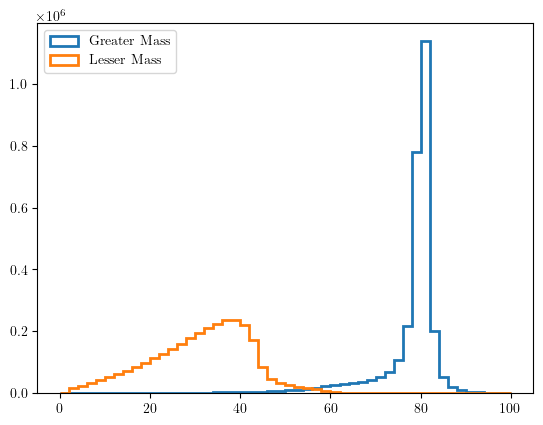

In [108]:
plt.hist(np.where(WBosonM['m'] > WBosonP['m'],WBosonM['m'],WBosonP['m']),bins=50,range=[0,100],histtype='step',lw=2,label='Greater Mass')
plt.hist(np.where(WBosonM['m'] < WBosonP['m'],WBosonM['m'],WBosonP['m']),bins=50,range=[0,100],histtype='step',lw=2,label='Lesser Mass')
#plt.title(r"$W$/$W^*$ counts = {}/{}".format(len(WP_on),len(WM_on)))
plt.legend(loc=2)
plt.show()

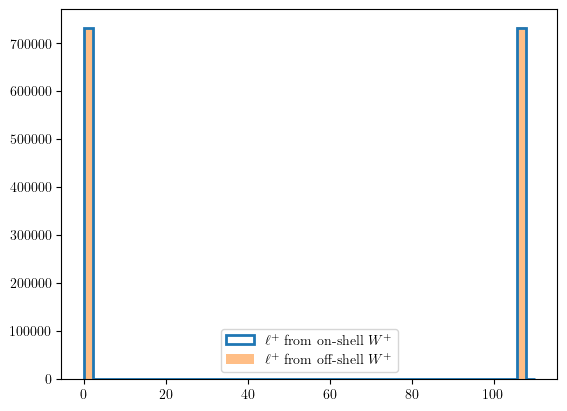

In [109]:
plt.hist(LeptonP['m'][WP_on]*MeV,bins=50,range=[0,110],histtype='step',lw=2,label=r'$\ell^+$ from on-shell $W^+$')
plt.hist(LeptonP['m'][WM_on]*MeV,bins=50,range=[0,110],histtype='bar',alpha=0.5,label=r'$\ell^+$ from off-shell $W^+$')
plt.legend()

plt.show()

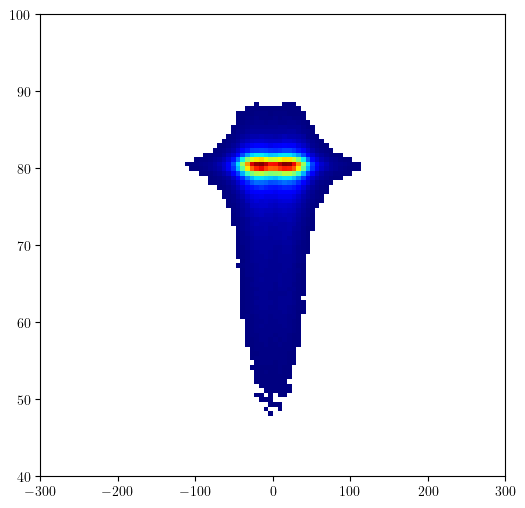

In [56]:
fig = plt.figure(figsize=(6,6))
plt.hist2d(LeptonP['px'][WP_on],WBosonP['m'][WP_on],range=[[-300,300],[40,100]],bins=[100,100],cmap=my_cmap,vmin=100)
plt.show()


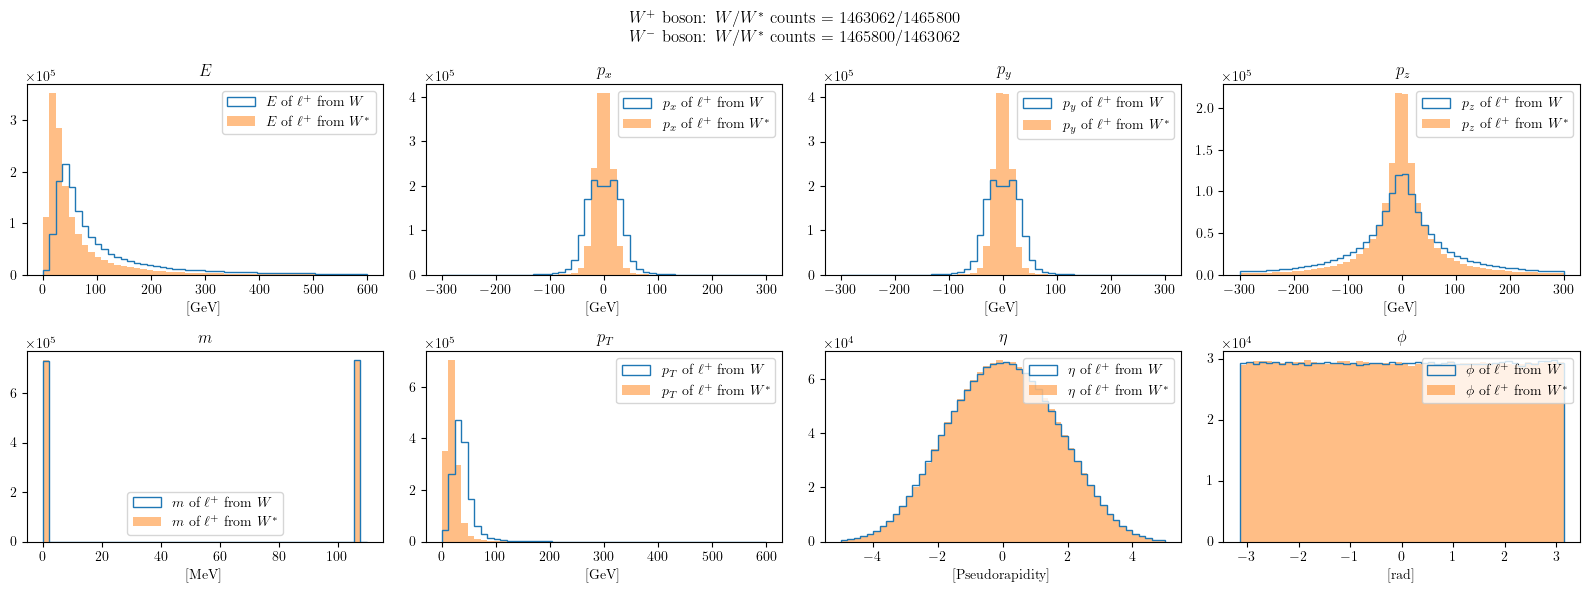

In [25]:
plt.style.use("default")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
p,q = 4,2
fig, ax = plt.subplots(figsize=(4*p,3*q),ncols=p,nrows=q,tight_layout = True)
WP_on = np.where(WBosonP['m'] > WBosonM['m'],True,False)
WM_on = np.where(WBosonM['m'] > WBosonP['m'],True,False)
MeV = 1000
plt.suptitle(r"$W^+$ boson: $W$/$W^*$ counts = {}/{}".format(len(WP_on[WP_on == True]),len(WM_on[WP_on == False]))+'\n'
             r"$W^-$ boson: $W$/$W^*$ counts = {}/{}".format(len(WM_on[WM_on == True]),len(WM_on[WM_on == False])))
x_label = [['E','px','py','pz'],['m','pt','eta','phi']]
x_legend = [[r'$E$',r'$p_x$',r'$p_y$',r'$p_z$'],[r'$m$',r'$p_T$',r'$\eta$',r'$\phi$']]
x_range = [[[0,600],[-300,300],[-300,300],[-300,300]],[[0,110],[0,600],[-5,5],[-np.pi,np.pi]]]
x_unit = [[' [GeV]',' [GeV]',' [GeV]',' [GeV]'],[' [MeV]',' [GeV]',' [Pseudorapidity]',' [rad]']]
for j in range(q):
    for i in range(p):
        unit = 1000 if i+4*j == 4 else 1
        ax[j,i].hist(LeptonP[x_label[j][i]][WP_on]*unit,bins=50,range = x_range[j][i],histtype = 'step',lw=1,label=x_legend[j][i]+r' of $\ell^+$ from $W$')
        ax[j,i].hist(LeptonP[x_label[j][i]][WM_on]*unit,bins=50,range = x_range[j][i],histtype = 'bar',alpha=0.5,label=x_legend[j][i]+r' of $\ell^+$ from $W^*$')
        ax[j,i].set_title(x_legend[j][i])
        ax[j,i].set_xlabel(x_unit[j][i])
        ax[j,i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        ax[j,i].legend()
plt.show()

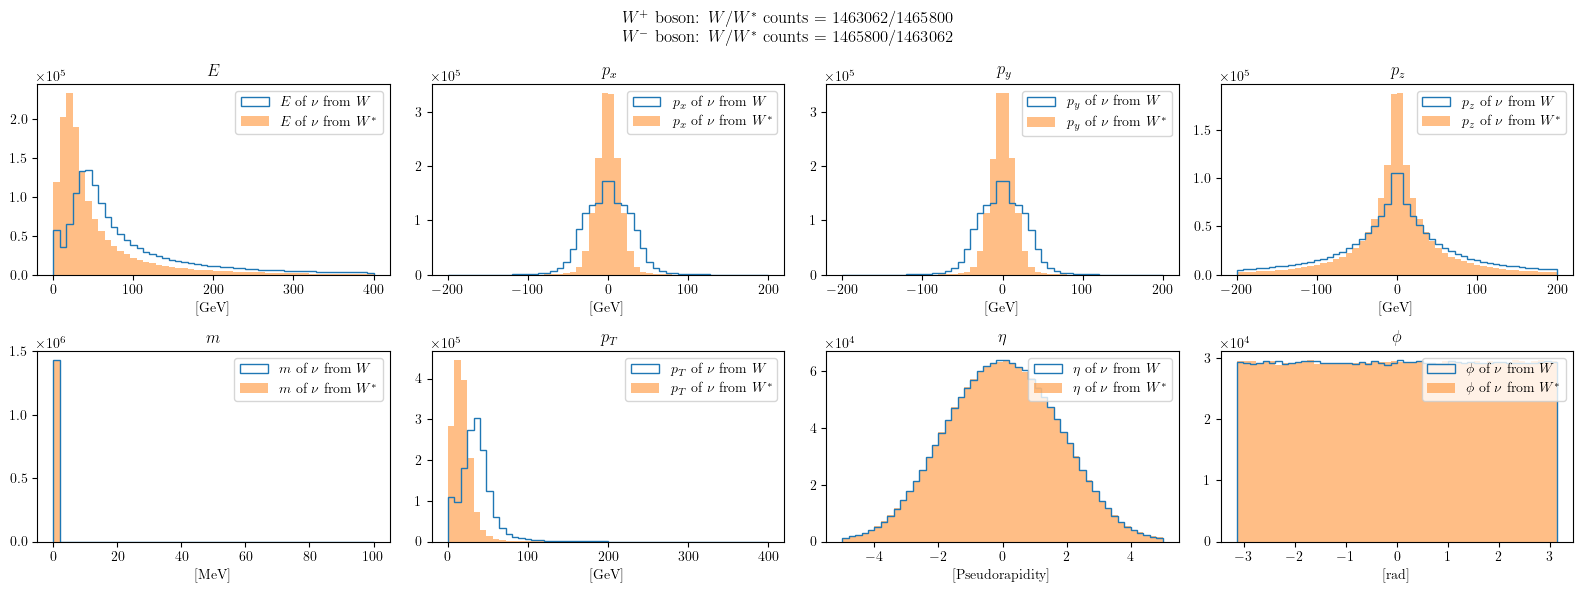

In [40]:
plt.style.use("default")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
p,q = 4,2
fig, ax = plt.subplots(figsize=(4*p,3*q),ncols=p,nrows=q,tight_layout = True)
WP_on = np.where(WBosonP['m'] > WBosonM['m'],True,False)
WM_on = np.where(WBosonM['m'] > WBosonP['m'],True,False)
MeV = 1000
plt.suptitle(r"$W^+$ boson: $W$/$W^*$ counts = {}/{}".format(len(WP_on[WP_on == True]),len(WM_on[WP_on == False]))+'\n'
             r"$W^-$ boson: $W$/$W^*$ counts = {}/{}".format(len(WM_on[WM_on == True]),len(WM_on[WM_on == False])))
x_label = [['E','px','py','pz'],['m','pt','eta','phi']]
x_legend = [[r'$E$',r'$p_x$',r'$p_y$',r'$p_z$'],[r'$m$',r'$p_T$',r'$\eta$',r'$\phi$']]
x_range = [[[0,400],[-200,200],[-200,200],[-200,200]],[[0,100],[0,400],[-5,5],[-np.pi,np.pi]]]
x_unit = [[' [GeV]',' [GeV]',' [GeV]',' [GeV]'],[' [MeV]',' [GeV]',' [Pseudorapidity]',' [rad]']]
for j in range(q):
    for i in range(p):
        unit = 1000 if i+4*j == 4 else 1
        ax[j,i].hist(NeutrinoP[x_label[j][i]][WP_on]*unit,bins=50,range = x_range[j][i],histtype = 'step',lw=1,label=x_legend[j][i]+r' of $\nu$ from $W$')
        ax[j,i].hist(NeutrinoP[x_label[j][i]][WM_on]*unit,bins=50,range = x_range[j][i],histtype = 'bar',alpha=0.5,label=x_legend[j][i]+r' of $\nu$ from $W^*$')
        ax[j,i].set_title(x_legend[j][i])
        ax[j,i].set_xlabel(x_unit[j][i])
        ax[j,i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        ax[j,i].legend()
plt.show()

In [31]:
A = np.array([True,False,False])
B = np.array([True,True ,False])
print(A+B)


[ True  True False]


In [47]:
_,lpl_counts = np.unique(LP_lead,return_counts=True)
_,lml_counts = np.unique(LM_lead,return_counts=True)
print("{:.4f}% of leading leptons are positive".format((lpl_counts[-1]/len(LP_lead)*100)))
print("{:.4f}% of leading leptons are negative".format((lml_counts[-1]/len(LM_lead)*100)))
print("{:.4f}% of leading leptons have greater W mass".format(((len(LeptonP['pt'][LP_lead & WP_on]) + len(LeptonM['pt'][LM_lead & WM_on]))/len(LM_lead)*100)))
print("{:.4f}% of leading leptons have lesser  W mass".format(((len(LeptonP['pt'][LP_lead & WM_on]) + len(LeptonM['pt'][LM_lead & WP_on]))/len(LM_lead)*100)))
print("{:.4f}% of sub-leading leptons have greater W mass".format(((len(LeptonP['pt'][LM_lead & WP_on]) + len(LeptonM['pt'][LP_lead & WM_on]))/len(LM_lead)*100)))
print("{:.4f}% of sub-leading leptons have lesser  W mass".format(((len(LeptonP['pt'][LM_lead & WM_on]) + len(LeptonM['pt'][LP_lead & WP_on]))/len(LM_lead)*100)))

50.0092% of leading leptons are positive
49.9908% of leading leptons are negative
82.9409% of leading leptons have greater W mass
17.0591% of leading leptons have lesser  W mass
17.0591% of sub-leading leptons have greater W mass
82.9409% of sub-leading leptons have lesser  W mass


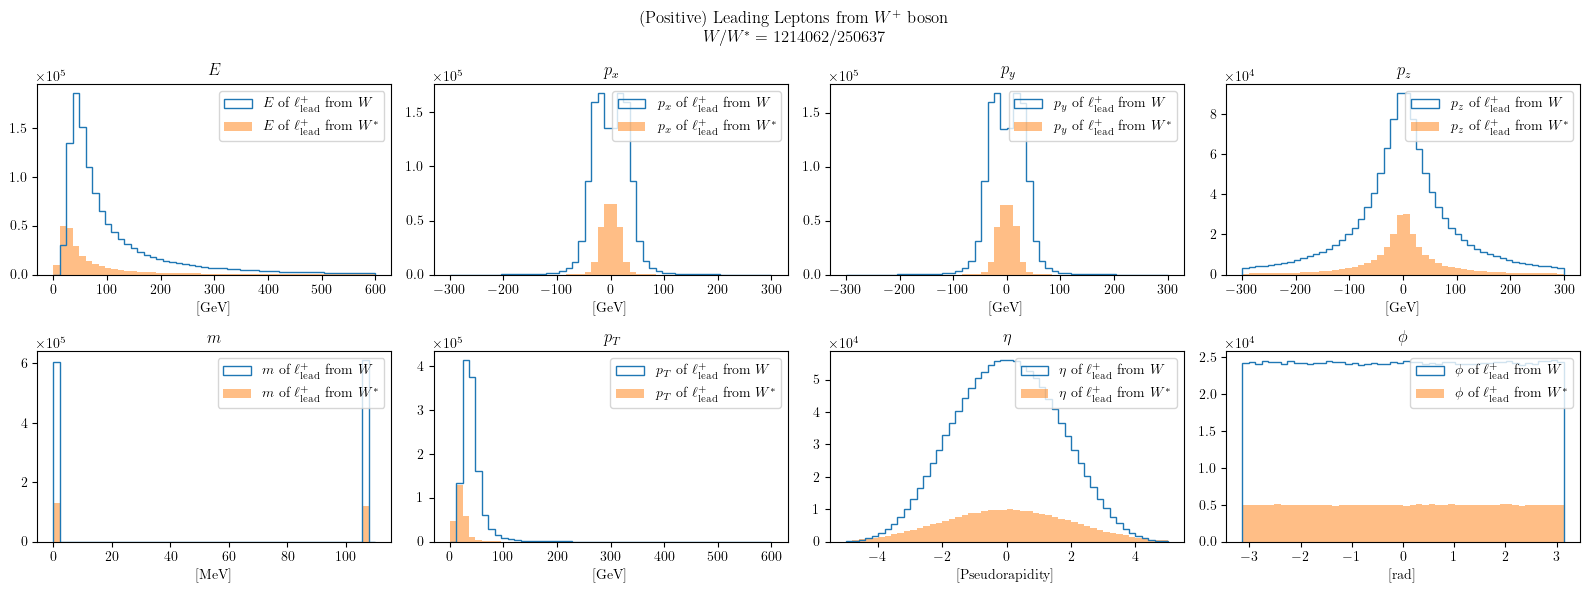

In [48]:
#WP_on selects events where W+ boson has greater mass
## Find events where lepton+ is leading
LP_lead = np.where(LeptonP['pt'] > LeptonM['pt'],True,False)
#WM_on selects events where W- boson has greater mass
## Find events where lepton- is leading
LM_lead = np.where(LeptonM['pt'] > LeptonP['pt'],True,False)
plt.style.use("default")
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern']
p,q = 4,2
fig, ax = plt.subplots(figsize=(4*p,3*q),ncols=p,nrows=q,tight_layout = True)

MeV = 1000
plt.suptitle(r"(Positive) Leading Leptons from $W^+$ boson"+'\n'+\
             r"$W/W^* = {}/{}$".format(len(LeptonP['E'][WP_on & LP_lead]),len(LeptonP['E'][WM_on & LP_lead])))
x_label = [['E','px','py','pz'],['m','pt','eta','phi']]
x_legend = [[r'$E$',r'$p_x$',r'$p_y$',r'$p_z$'],[r'$m$',r'$p_T$',r'$\eta$',r'$\phi$']]
x_range = [[[0,600],[-300,300],[-300,300],[-300,300]],[[0,110],[0,600],[-5,5],[-np.pi,np.pi]]]
x_unit = [[' [GeV]',' [GeV]',' [GeV]',' [GeV]'],[' [MeV]',' [GeV]',' [Pseudorapidity]',' [rad]']]
for j in range(q):
    for i in range(p):
        unit = 1000 if i+4*j == 4 else 1
        ax[j,i].hist(LeptonP[x_label[j][i]][WP_on & LP_lead]*unit,bins=50,range = x_range[j][i],histtype = 'step',lw=1,label=x_legend[j][i]+r' of $\ell^+_\mathrm{lead}$ from $W$')
        ax[j,i].hist(LeptonP[x_label[j][i]][WP_on & LM_lead]*unit,bins=50,range = x_range[j][i],histtype = 'bar',alpha=0.5,label=x_legend[j][i]+r' of $\ell^+_\mathrm{lead}$ from $W^*$')
        ax[j,i].set_title(x_legend[j][i])
        ax[j,i].set_xlabel(x_unit[j][i])
        ax[j,i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        ax[j,i].legend()
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import NuSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
import xgboost as xgb
from xgbtune import tune_xgb_model

In [52]:
'''
sample preparation
features:
    lepton+ and lepton-:
            four vectors and m pT eta phi. 
            Histogram above suggest mass, eta and phi may not be helpful in this classification task
Purpose of this model: To identify if the lepton is associated with a W boson of greater ("On-shell") or lesser mass
training data shape [[f00,f01,f02,f03],\ #event 0 features {1,2,3,4}
                     [f10,f11,f12,f13],\ #event 1 features {1,2,3,4}
                     [f20,f21,f22,f23]]  #event 2 features {1,2,3,4}
'''
WP_on = np.where(WBosonP['m'] > WBosonM['m'],True,False)
WM_on = np.where(WBosonM['m'] > WBosonP['m'],True,False)
#LP_lead = np.where(LeptonP['pt'] > LeptonM['pt'],True,False)
#LM_lead = np.where(LeptonM['pt'] > LeptonP['pt'],True,False)
#lp = (LeptonP.iloc[LP_lead,[0,1,2,3,5]]).to_numpy() # select only leading lepton+
#lm = (LeptonM.iloc[LM_lead,[0,1,2,3,5]]).to_numpy() # select only leading lepton-
lp = (LeptonP.iloc[:,[0,1,2,3,5]]).to_numpy()
lm = (LeptonM.iloc[:,[0,1,2,3,5]]).to_numpy()
print(type(lp),lp.shape)
print(type(lm),lm.shape)
all_leptons = np.concatenate([lp,lm],axis=0)
lpl = np.where(WP_on == True, 1,0) # for lepton+ label 1 for W+ mass > W- mass, 0 otherwise
lml = np.where(WM_on == True, 1,0) # for lepton- label 1 for W- mass > W+ mass, 0 otherwise
#lpl = np.where(WBosonP['m'][LP_lead] > WBosonM['m'][LP_lead],1,0) # for leading lepton+ label 1 for W+ mass > W- mass, 0 otherwise
#lml = np.where(WBosonM['m'][LM_lead] > WBosonP['m'][LM_lead],1,0) # for leading lepton- label 1 for W- mass > W+ mass, 0 otherwise
all_labels = np.concatenate([lpl,lml])
print(all_leptons.shape)
print(all_labels.shape)
del(lp,lm,lpl,lml)
sample_size = 200000
sample = np.random.choice(len(all_labels),sample_size,replace=False)
train_data, test_data, train_label, test_label = train_test_split(all_leptons[sample],all_labels[sample],test_size=0.2, random_state=43, shuffle=True)
#test_data , val_data , test_label , val_label  = train_test_split(test_data,test_label,test_size=0.2, random_state=41, shuffle=True)
print(train_data.shape, train_label.shape)
print( test_data.shape , test_label.shape)
#print(  val_data.shape  , val_label.shape)

<class 'numpy.ndarray'> (2928862, 5)
<class 'numpy.ndarray'> (2928862, 5)
(5857724, 5)
(5857724,)
(160000, 5) (160000,)
(40000, 5) (40000,)


### SVM Classifier to identify lepton associated with W boson of greater mass

In [33]:
classifier = svm.SVC(C=10)
classifier.fit(train_data,train_label)

SVC(C=10)

0.8263

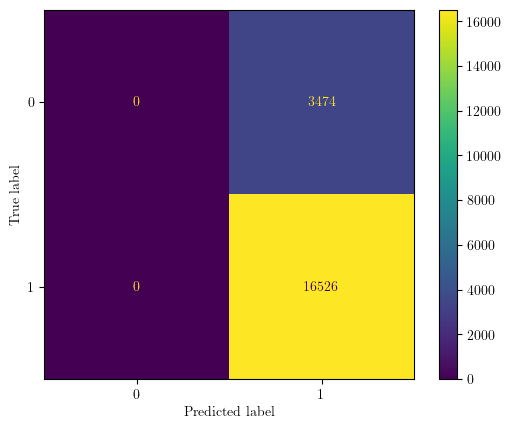

In [34]:
test_pred = classifier.predict(test_data)
ConfusionMatrixDisplay.from_predictions(test_label, np.full(len(test_label),1))
accuracy_score(test_label,np.full(len(test_label),1), normalize=True)

### BDT Classifier to identify lepton associated with W boson of greater mass

In [55]:
classifier= make_pipeline(StandardScaler(),xgb.XGBClassifier(n_estimators = 2000, n_jobs = 4))
classifier.fit(train_data,train_label)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=2000,
                               n_jobs=4, num_parallel_tree=None, predictor=None,
                               random_state=None, ...))])

0.7582569612361388

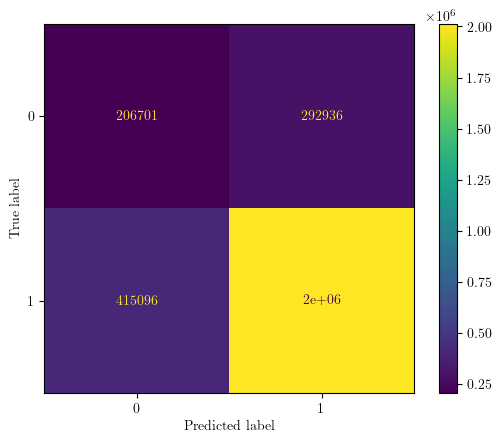

In [56]:
test_pred = classifier.predict(test_data)
lp = (LeptonP.iloc[LP_lead,[0,1,2,3,5]]).to_numpy() # select only leading lepton+
lm = (LeptonM.iloc[LM_lead,[0,1,2,3,5]]).to_numpy() # select only leading lepton-
lpl = np.where(WBosonP['m'][LP_lead] > WBosonM['m'][LP_lead],1,0) # for leading lepton+ label 1 for W+ mass > W- mass, 0 otherwise
lml = np.where(WBosonM['m'][LM_lead] > WBosonP['m'][LM_lead],1,0) # for leading lepton- label 1 for W- mass > W+ mass, 0 otherwise
prediction = classifier.predict(np.concatenate([lp,lm]))
label = np.concatenate([lpl,lml])
ConfusionMatrixDisplay.from_predictions(label, prediction)
accuracy_score(label,prediction, normalize=True)

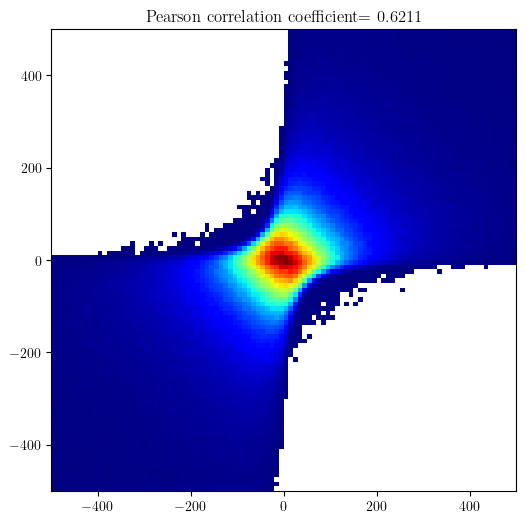

In [88]:
fig = plt.figure(figsize=(6,6))
R = 500
plt.hist2d(diLepton['pz'],diNeutrino['pz'],bins=[100,100],range=[[-R,R],[-R,R]],cmap=my_cmap,vmin=10)
plt.title("Pearson correlation coefficient= {:.4f}".format(np.corrcoef(diLepton['pz'],diNeutrino['pz'])[0,1]))
plt.show()

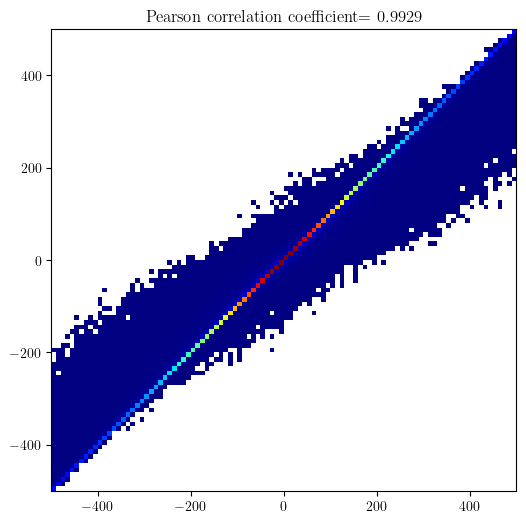

In [89]:
fig = plt.figure(figsize=(6,6))
R = 500
plt.hist2d(Higgs['pz'],diLepton['pz']+diNeutrino['pz'],bins=[100,100],range=[[-R,R],[-R,R]],cmap=my_cmap,vmin=10)
plt.title("Pearson correlation coefficient= {:.4f}".format(np.corrcoef(Higgs['pz'],diLepton['pz']+diNeutrino['pz'])[0,1]))
plt.show()

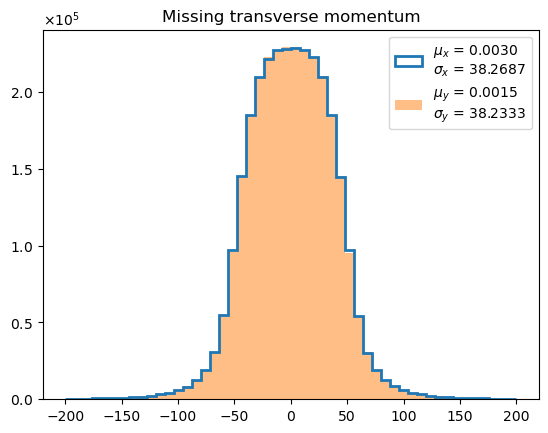

In [17]:
px_mean = np.mean(MET['px'])
py_mean = np.mean(MET['py'])
px_stdev = np.std(MET['px'])
py_stdev = np.std(MET['py'])
plt.title("Missing transverse momentum")
plt.hist(MET['px'],bins = 50, histtype='step', lw=2, range=[-200,200], label = r'$\mu_x$ = {:.4f}'.format(px_mean)+'\n'+r'$\sigma_x$ = {:.4f}'.format(px_stdev))
plt.hist(MET['py'],bins = 50, histtype='bar', alpha=0.5,range=[-200,200],label = r'$\mu_y$ = {:.4f}'.format(py_mean)+'\n'+r'$\sigma_y$ = {:.4f}'.format(py_stdev))
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.legend()
plt.show()

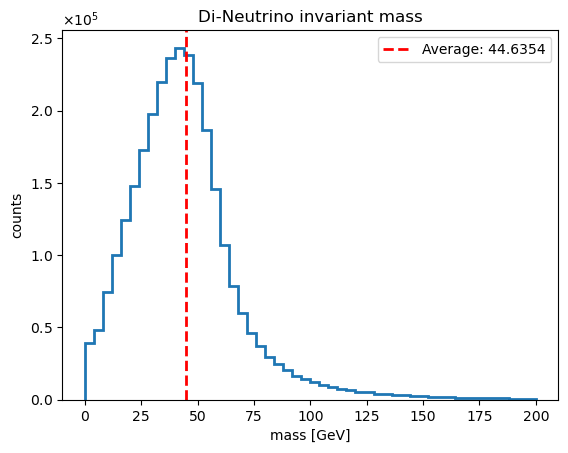

In [33]:
diNu_pT = np.sqrt((diNeutrino['px'])**2+(diNeutrino['py'])**2)
plt.title('Di-Neutrino invariant mass')
plt.hist(diNu_pT, bins=50, histtype='step',lw=2,range=[0,200])
plt.axvline(np.mean(diNu_pT),ls='dashed',lw=2,c='r',label = 'Average: {:.4f}'.format(np.mean(diNu_pT)))
plt.xlabel("mass [GeV]")
plt.ylabel("counts")
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.legend()
plt.show()

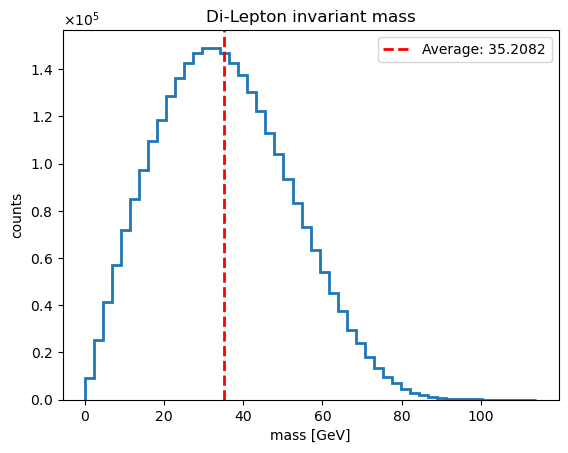

In [32]:
plt.title('Di-Lepton invariant mass')
plt.hist( diLepton['m'], bins=50, histtype='step',lw=2)
plt.axvline(np.mean(mll),ls='dashed',lw=2,c='r',label = 'Average: {:.4f}'.format(np.mean(mll)))
plt.xlabel("mass [GeV]")
plt.ylabel("counts")
plt.ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
plt.legend()
plt.show()

# Lorentz Boost

In [4]:
# Boost to self
mv.BoostToRest(Higgs  , 'H', None, Higgs  , 'H', None) 
mv.BoostToRest(WBosonP, 'W', None, WBosonP, 'W', None)
mv.BoostToRest(WBosonM, 'W', None, WBosonM, 'W', None)
# Boost W to Higgs rest frame
mv.BoostToRest(WBosonP,'Wp', None, Higgs, 'H', None) 
mv.BoostToRest(WBosonM,'Wm', None, Higgs, 'H', None)
#Boost leptons to Higgs rest frame
mv.BoostToRest(LeptonP,'lp', None, Higgs, 'H', None) 
mv.BoostToRest(LeptonM,'lm', None, Higgs, 'H', None)

In [5]:
mv.BoostToRest(LeptonP  ,'lp', None, WBosonP, 'W', None)
mv.BoostToRest(LeptonM  ,'lm', None, WBosonM, 'W', None)
mv.BoostToRest(NeutrinoP,'np', None, WBosonP, 'W', None)
mv.BoostToRest(NeutrinoM,'nm', None, WBosonM, 'W', None)

In [6]:
# For CGLMP Calculations
#from Higgs rest frame, boost again to the rest frame of W (also in Higgs rest frame)
mv.BoostToRest(LeptonP,'lpH', ['E_H','px_H','py_H','pz_H'], WBosonP, 'WH', ['E_H','px_H','py_H','pz_H'])
mv.BoostToRest(LeptonM,'lmH', ['E_H','px_H','py_H','pz_H'], WBosonM, 'WH', ['E_H','px_H','py_H','pz_H'])

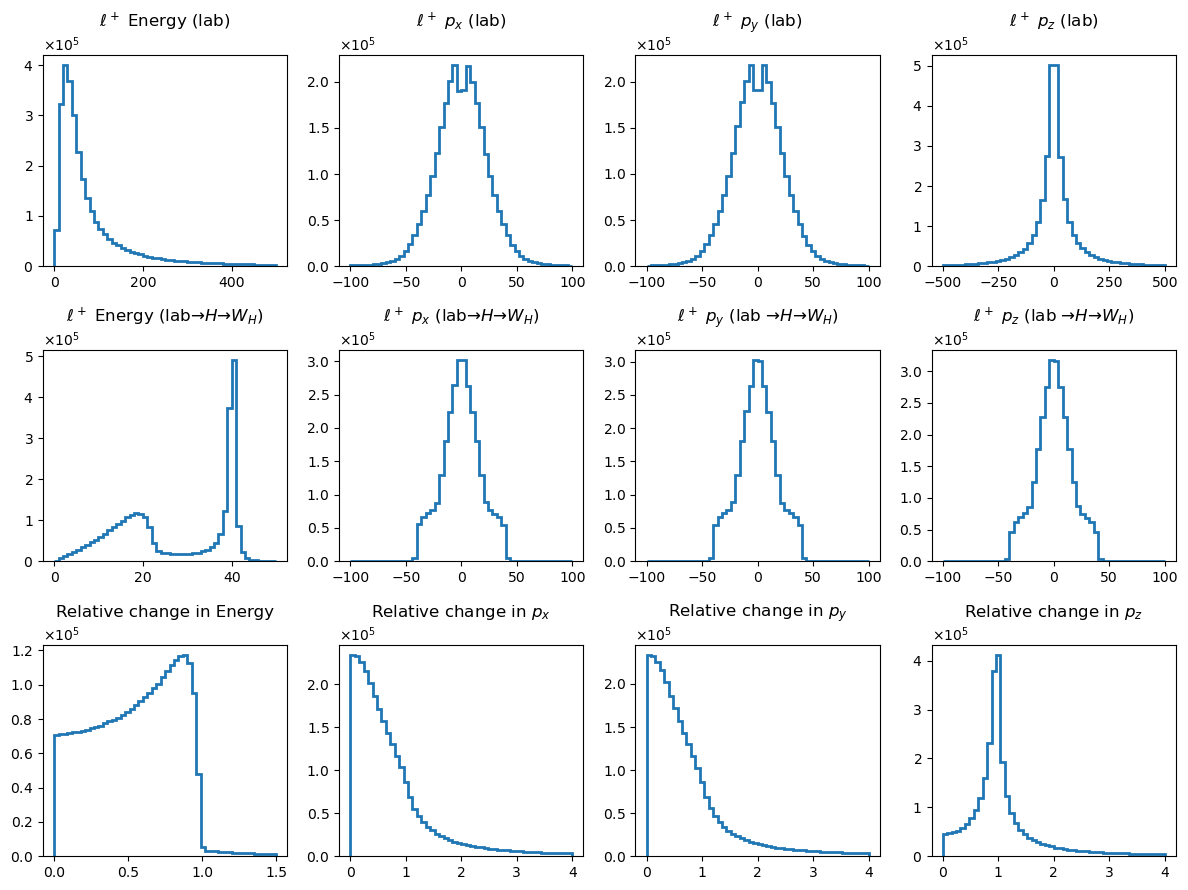

In [8]:
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize=(12,9),tight_layout=True)
p4 = ['E','px','py','pz']
titles=[[r'$\ell^+$ Energy (lab)',r'$\ell^+$ $p_x$ (lab)',r'$\ell^+$ $p_y$ (lab)',r'$\ell^+$ $p_z$ (lab)'],\
        [r'$\ell^+$ Energy (lab$\to H \to W_H$)',r'$\ell^+$ $p_x$ (lab$\to H \to W_H$)',r'$\ell^+$ $p_y$ (lab $\to H \to W_H$)',r'$\ell^+$ $p_z$ (lab $\to H \to W_H$)'],\
        [r'Relative change in Energy', r'Relative change in $p_x$',r'Relative change in $p_y$',r'Relative change in $p_z$']]
xranges=[ [ [0,500],[-100,100],[-100,100],[-500,500] ],\
          [ [0, 50],[-100,100],[-100,100],[-100,100] ],\
          [ [0,1.5],[0,4],[0,4],[0,4] ] ]
for i in range(4):
    ax[0,i].hist(LeptonP[p4[i]]  ,bins=50,histtype='step',lw=2,range=xranges[0][i])
    ax[1,i].hist(LeptonP[p4[i]+'_H_WH'],bins=50,histtype='step',lw=2,range=xranges[1][i])
    ax[2,i].hist(np.abs(1-LeptonP[p4[i]+'_H_WH']/LeptonP[p4[i]]),bins=50,histtype='step',lw=2,range=xranges[2][i])
    for j in range(3):
        ax[j,i].set_title(titles[j][i],pad=20)
        ax[j,i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))

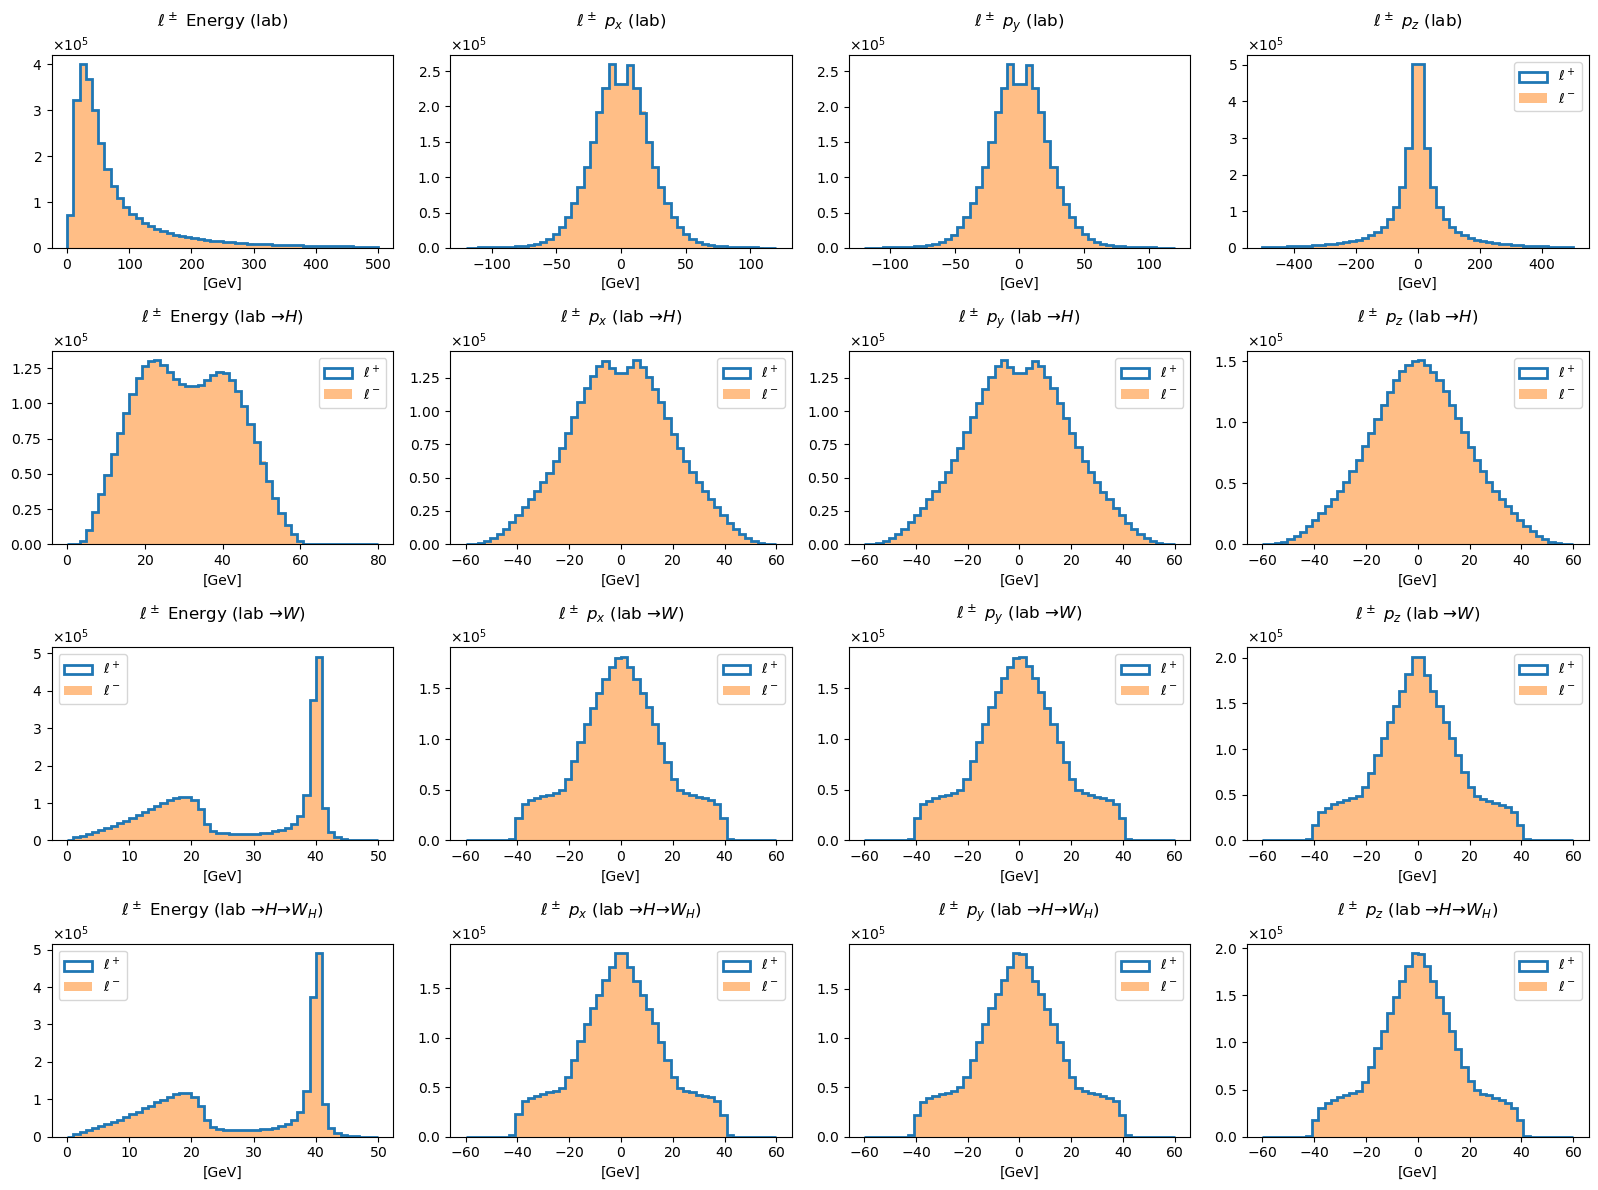

In [13]:
fig, ax = plt.subplots(nrows=4, ncols =4, figsize=(16,12))

ref_frame = [r' (lab)',r' (lab $\to H$)',r' (lab $\to W$)',r' (lab $\to H \to W_H$)']
component = [' Energy',' $p_x$',' $p_y$',' $p_z$']
p4 = ['E','px','py','pz']
rf = ['','_H','_W','_H_WH']
xrange = [[ [0,500],[-120,120],[-120,120],[-500,500] ],\
          [ [0, 80],[-60,60],[-60,60],[-60,60] ],\
          [ [0, 50],[-60,60],[-60,60],[-60,60] ],\
          [ [0, 50],[-60,60],[-60,60],[-60,60] ]]
for i in range(4):
    for j in range(4):
        ax[i,j].set_title(r'$\ell^\pm$'+component[j]+ref_frame[i],pad=20)
        ax[i,j].hist(LeptonP[p4[j]+rf[i]],histtype='step',bins=50,range=xrange[i][j],label=r'$\ell^+$',lw=2)
        ax[i,j].hist(LeptonM[p4[j]+rf[i]],histtype='bar' ,bins=50,range=xrange[i][j],label=r'$\ell^-$',alpha=0.5)
        ax[i,j].set_xlabel('[GeV]')
        ax[i,j].ticklabel_format(axis='X', style='sci', useMathText=True, scilimits=(-4,4))
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
        if( i > 0 or j > 2 ): ax[i,j].legend()
plt.tight_layout()

# SVM regression model

## di-Neutrino system invariant mass

In [3]:
def norm_data(data_array,  avg, std):
    if avg == None:
        avg = np.average(data_array)
        std = np.std(data_array)
    return (data_array-avg)/std
    
def inv_norm(norm_data, avg, std):
    return (norm_data*std)+avg

In [6]:
# Building four-vector for diNeutrino system

diNeutrino = pd.DataFrame()
for i,j in enumerate(['E','px','py','pz']):
    diNeutrino[j] = NeutrinoP[j] + NeutrinoM[j]
diNeutrino['m2'] = diNeutrino['E']**2 - diNeutrino['px']**2 - diNeutrino['py']**2 - diNeutrino['pz']**2
diNu_include = np.where(diNeutrino['m2'] < 0, False, True)
m_avg = np.average(np.sqrt(diNeutrino['m2'][diNu_include]))
m_std = np.std(np.sqrt(diNeutrino['m2'][diNu_include]))
norm_diNu_m = (np.sqrt(diNeutrino['m2'][diNu_include])-m_avg)/m_std

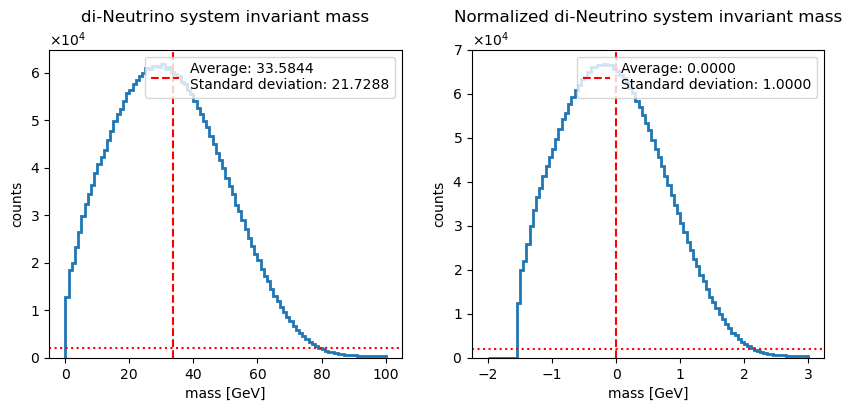

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
ax[0].set_title("di-Neutrino system invariant mass",pad=20)
ax[1].set_title("Normalized di-Neutrino system invariant mass",pad=20)

#plt.axvline(m_avg,ls='dashed',c='r',lw=2,label='Average mass: {:.4f} GeV'.format(m_avg))
ax[0].hist(np.sqrt(diNeutrino['m2'][diNu_include]),bins=100,histtype='step',lw=2, range=[0,100])
ax[1].hist((np.sqrt(diNeutrino['m2'][diNu_include])-m_avg)/m_std,bins=100,histtype='step',lw=2, range=[-2,3])
ax[0].axvline(np.average(np.sqrt(diNeutrino['m2'][diNu_include])),c='r', ls = 'dashed',\
              label='Average: {:.4f}'.format(np.average(np.sqrt(diNeutrino['m2'][diNu_include])))+\
              '\nStandard deviation: {:.4f}'.format(np.std(np.sqrt(diNeutrino['m2'][diNu_include]))))
ax[1].axvline(np.average(norm_diNu_m),c='r', ls = 'dashed',\
              label='Average: {:.4f}'.format(np.average(norm_diNu_m))+\
              '\nStandard deviation: {:.4f}'.format(np.std(norm_diNu_m)))
for i in range(2):
    ax[i].set_xlabel("mass [GeV]")
    ax[i].set_ylabel("counts")
    ax[i].axhline(2000,c='r',ls='dotted')
    ax[i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))
    ax[i].legend()

plt.show()

In [9]:
%%time
data_range = [-3,3]
data_min = data_range[0]
data_max = data_range[1]
div = 300
step = (data_max - data_min)/div
indexes = []
#N = math.ceil((data_max - data_min)/step)
for i in range(div):
    indexes.append(list())

for i  in range(len(norm_diNu_m)):
    if diNeutrino['m2'][i]>0:
        if norm_diNu_m[i]<data_max and norm_diNu_m[i]>=data_min:
            bin_id = int((norm_diNu_m[i] - data_min)//step)
            indexes[bin_id].append(i)

CPU times: user 30.7 s, sys: 0 ns, total: 30.7 s
Wall time: 30.7 s


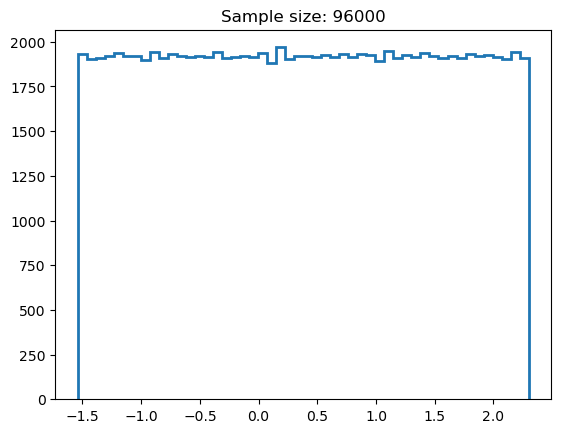

In [10]:
N = 500
sample_count = []
index_arr = np.array([])
for i in range(div):
    if len(indexes[i])>=N :
        sample = np.random.choice(indexes[i],size=N, replace = False)
        index_arr = np.concatenate((index_arr,sample)).astype(int)
plt.hist(norm_diNu_m[index_arr],bins=50, histtype='step',lw=2)
plt.title('Sample size: {}'.format(len(index_arr)))
plt.show()

Text(0.5, 0.98, 'Kinematic variable distribution after di-Neutrino mass undersampling')

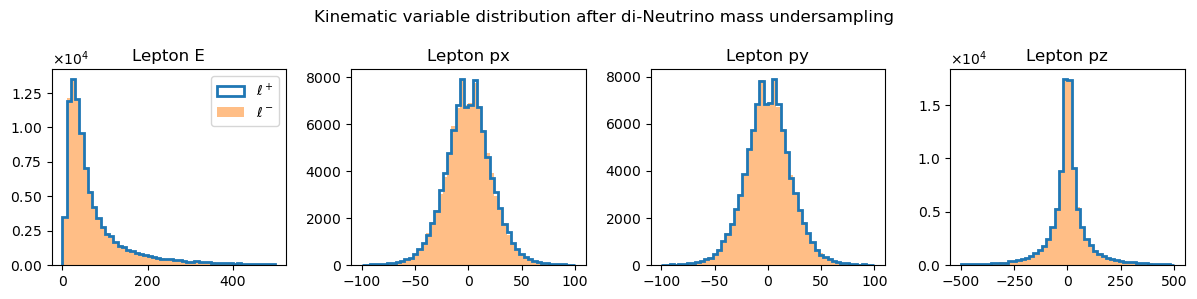

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=4,figsize=(12,3),tight_layout=True)
ax = ax.flatten()
xrange = [[0,500],[-100,100],[-100,100],[-500,500]]
for i,j in enumerate(['E','px','py','pz']):
    ax[i].hist(LeptonP[j][index_arr],bins=50,histtype='step',lw=2,range=xrange[i],label=r'$\ell^+$')
    ax[i].hist(LeptonM[j][index_arr],bins=50,histtype='bar',alpha=0.5,range=xrange[i],label=r'$\ell^-$')
    ax[i].set_title('Lepton '+j)
    ax[i].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))   
ax[0].legend()
plt.suptitle("Kinematic variable distribution after di-Neutrino mass undersampling")

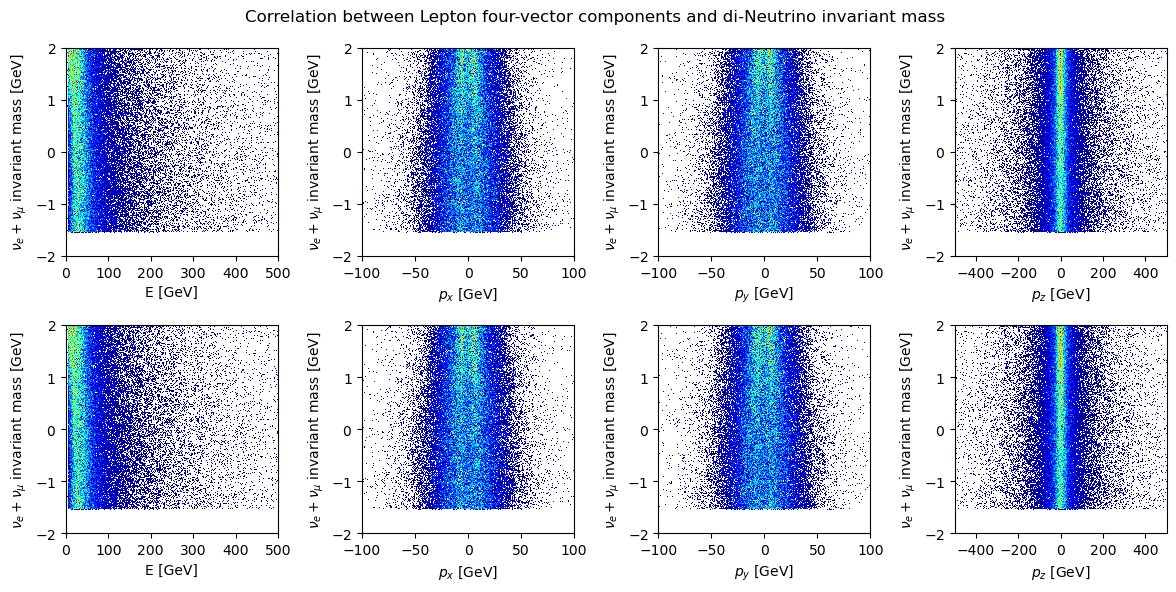

In [12]:
fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(12,6),tight_layout=True)
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
plt.suptitle("Correlation between Lepton four-vector components and di-Neutrino invariant mass")
xrange = [[0,500],[-100,100],[-100,100],[-500,500]]
yrange = [-2,2]
for i, j in enumerate(['E','px','py','pz']):
    #ax[0,i].scatter(LeptonP[j][evts],np.sqrt(diNeutrino['m2'][evts]),s=0.002)
    #ax[1,i].scatter(LeptonM[j][evts],np.sqrt(diNeutrino['m2'][evts]),s=0.002)
    ax[0,i].hist2d(LeptonP[j][index_arr],norm_diNu_m[index_arr], bins=250, vmin = 1, cmap=my_cmap,range=[xrange[i],yrange])
    ax[1,i].hist2d(LeptonP[j][index_arr],norm_diNu_m[index_arr], bins=250, vmin = 1, cmap=my_cmap,range=[xrange[i],yrange])
for i in range(2):
    for j,k in enumerate([r'E',r'$p_x$',r'$p_y$',r'$p_z$']):
        #ax[i,j].set_xlim(xrange[j])
        #ax[i,j].set_ylim(yrange)
        ax[i,j].set_xlabel(k+' [GeV]')
        ax[i,j].set_ylabel(r"$\nu_e+\nu_\mu$ invariant mass [GeV]")
        ax[i,j].ticklabel_format(axis='y', style='sci', useMathText=True, scilimits=(-4,4))

## Estimation of momentum component in W rest frame (after Higgs boost)

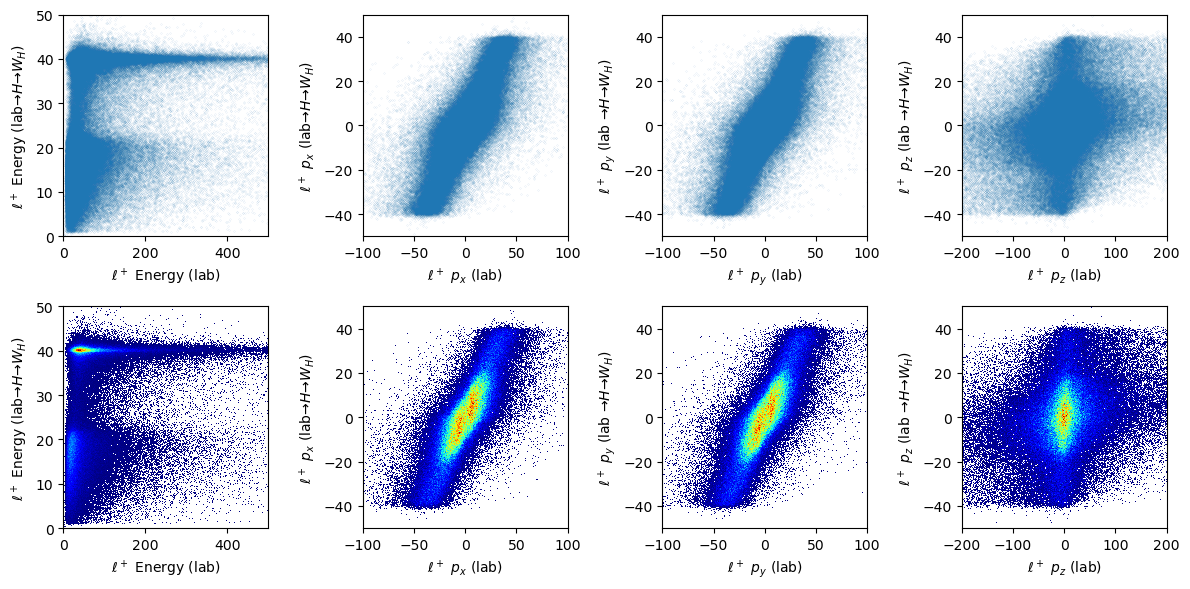

In [9]:
tot_evt = len(LeptonP['E'])
N_evts = 200000
evts = np.random.choice(tot_evt, N_evts)
fig, ax = plt.subplots(nrows=2, ncols=4, tight_layout=True,figsize=(12,6))
my_cmap = mpl.cm.get_cmap("jet").copy()
my_cmap.set_under('w')
xranges=[ [ [0,500],[-100,100],[-100,100],[-200,200] ],\
          [ [0, 50],[-50,50],[-50,50],[-50,50] ] ]
for i in range(4):
    ax[0,i].scatter(LeptonP[p4[i]][evts],LeptonP[p4[i]+'_W'][evts],s=0.002)
    #ax[0,i].scatter(LeptonP[p4[i]][evts],LeptonP[p4[i]+'_H_WH'][evts],s=0.05)
    ax[1,i].hist2d(LeptonP[p4[i]][evts],LeptonP[p4[i]+'_H_WH'][evts], bins=250, vmin = 1, cmap=my_cmap,range=[xranges[0][i],xranges[1][i]])
    ax[0,i].set_xlim(xranges[0][i])
    ax[0,i].set_ylim(xranges[1][i])

    for j in range(2):
        ax[j,i].set_xlabel(titles[0][i])
        ax[j,i].set_ylabel(titles[1][i])


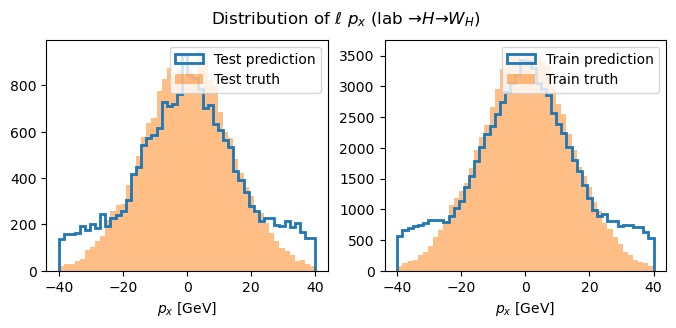

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
ax[0].hist(y_test, histtype='step',lw=2, bins=50,range=[-40,40],label='Test prediction')
ax[0].hist(y_test_pred, histtype='bar',alpha=0.5, bins=50,range=[-40,40],label = 'Test truth')
ax[1].hist(y_train, histtype='step',lw=2, bins=50,range=[-40,40], label = 'Train prediction')
ax[1].hist(y_train_pred, histtype='bar',alpha=0.5, bins=50,range=[-40,40], label= 'Train truth')
plt.suptitle(r"Distribution of $\ell^+$ $p_x$ (lab $\to H \to W_H$)")
for i in range(2):
    ax[i].set_xlabel(r'$p_x$ [GeV]')
    ax[i].legend()
plt.show()

## Define SVM model

In [13]:
from sklearn.svm import NuSVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

In [14]:
from sklearn.svm import NuSVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [13]:
evts=index_arr
LeptonP = LeptonP.rename(columns={'E':'E_p',"px":"px_p","py":"py_p","pz":"pz_p"})
LeptonM = LeptonM.rename(columns={'E':'E_m',"px":"px_m","py":"py_m","pz":"pz_m"})
x_train = LeptonP.iloc[evts,0:4]
x_train = pd.concat([x_train,LeptonM.iloc[evts,0:4]], axis=1)
y_train = norm_diNu_m[evts]
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [40]:
%%time
print(xgboost.__version__)
x_train = LeptonP.iloc[evts,0:4]
y_train = norm_diNu_m[evts]
x_train = pd.concat([x_train,LeptonM.iloc[evts,0:4]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)
model = xgboost.XGBRegressor(n_estimators=5000,booster='gbtree',eta=0.2,gamma=0.1)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
model.fit(x_train,y_train)

1.7.3
CPU times: user 7min 39s, sys: 15.1 s, total: 7min 54s
Wall time: 8min 47s


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=0.1, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [47]:
y_test_pred = model.predict(x_test)
y_train_pred= model.predict(x_train)
x_full = pd.concat([LeptonP.iloc[::,0:4],LeptonM.iloc[::,0:4]], axis=1)
y_full = model.predict(x_full)

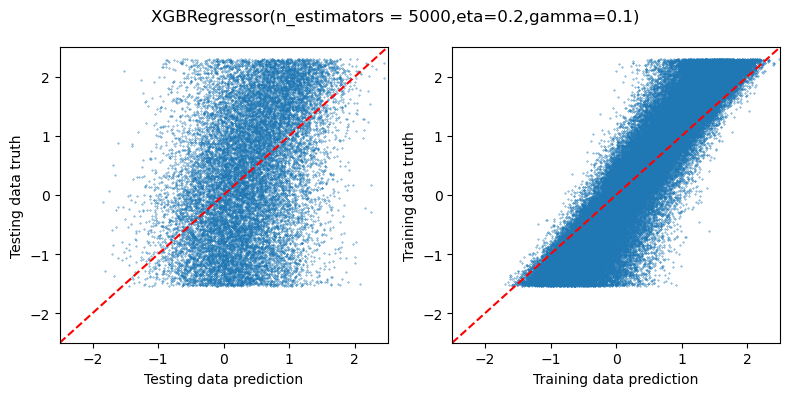

In [43]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,4),tight_layout=True)
#plt.suptitle("XGBRegressor(n_estimators = 5000,eta=0.2,gamma=0.1)")
plt.suptitle("NuSVR(kernel='rbf',C=100,gamma='scale',tol = 1e-6)")

ax[0].scatter(y_test_pred, y_test, s=0.1)
ax[1].scatter(y_train_pred, y_train, s=0.1)
ax[0].set_xlabel("Testing data prediction")
ax[1].set_xlabel("Training data prediction")
ax[0].set_ylabel("Testing data truth")
ax[1].set_ylabel("Training data truth")
for i in range(2):
    ax[i].set_xlim([-2.5,2.5])
    ax[i].plot([-2.5,2.5],[-2.5,2.5],ls='dashed',c='r')
    ax[i].set_ylim([-2.5,2.5])
plt.show()

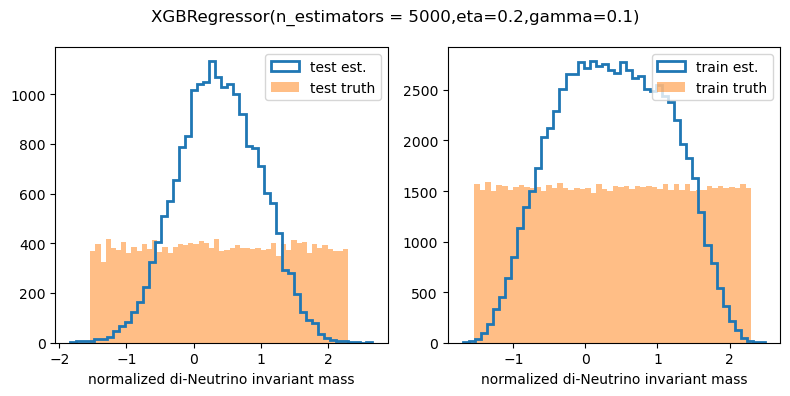

In [46]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(8,4),tight_layout=True)
plt.suptitle("XGBRegressor(n_estimators = 5000,eta=0.2,gamma=0.1)")
ax[0].hist(y_test_pred,histtype='step',lw=2,bins=50,label='test est.')
ax[0].hist(y_test, histtype='bar',alpha=0.5,bins=50,label='test truth')
ax[1].hist(y_train_pred,histtype='step',lw=2,bins=50,label='train est.')
ax[1].hist(y_train, histtype='bar',alpha=0.5,bins=50,label='train truth')
ax[2].hist(norm_diNu_m,histtype='step',lw=2,bins=50,label='full est.')
ax[2].hist(, histtype='bar',alpha=0.5,bins=50,label='full truth')
for i in range(3):
    ax[i].set_xlabel("normalized di-Neutrino invariant mass")
    ax[i].legend()

In [14]:
#np.random.seed(13)
tot_evt = np.arange(len(NeutrinoP['E']))
N_evts = 10000
evts = np.random.choice(index_arr, N_evts,replace=False)
#
#rng_sample = np.random.choice(tot_evt, size=sample_size)
x_train = LeptonP.iloc[evts,0:4]
x_train = pd.concat([x_train,LeptonM.iloc[evts,0:4]], axis=1)
#y_train = LeptonP['px_H_WH'][rng_sample] # momentum component
y_train = norm_diNu_m[evts]

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [ ]:
fig = plt.figure(figsize=(6,4))
plt.hist(y_train,bins=50,range=[-3,3],histtype='step',lw=2)
plt.title("Distribution of training data label value N = {}".format(len(y_train)))
plt.xlabel("Normalized undersampled di-Neutrino mass [GeV]")
plt.ylabel("Counts")
plt.show()

In [17]:
print('',x_train.shape,'\n',x_test.shape,'\n',\
         y_train.shape,'\n',y_test.shape)

 (8000, 8) 
 (2000, 8) 
 (8000,) 
 (2000,)


In [18]:
%%time
#linear’, ‘poly’, ‘rbf’, ‘sigmoid’
#svr_rbf = NuSVR(kernel='rbf',C=200,gamma='scale',tol = 1e-6)
svr = NuSVR()
mse_scorer = make_scorer(mean_squared_error)
parameters = {'kernel':('poly', 'rbf'), 'C':[10, 100], 'tol':[1e-3,1e-6]}
reg = GridSearchCV(svr, parameters,scoring=mse_scorer,n_jobs=-1)
reg.fit(x_train, y_train)
#svr_line = NuSVR(kernel='linear',C=10,gamma='scale',tol = 1e-5)
#svr_poly = NuSVR(kernel='poly',C=10,gamma='scale',tol = 1e-6)

CPU times: user 1h 18min 33s, sys: 1.36 s, total: 1h 18min 34s
Wall time: 2h 57min 2s


GridSearchCV(estimator=NuSVR(), n_jobs=-1,
             param_grid={'C': [10, 100], 'kernel': ('poly', 'rbf'),
                         'tol': [0.001, 1e-06]},
             scoring=make_scorer(mean_squared_error))

In [21]:
reg.best_params_

{'C': 100, 'kernel': 'poly', 'tol': 1e-06}

In [48]:
%%time 
svr_rbf = NuSVR(kernel='rbf',C=100,gamma='scale',tol = 1e-6)
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=-1):
    svr_rbf.fit(x_train, y_train)

CPU times: user 37min 50s, sys: 522 ms, total: 37min 50s
Wall time: 37min 51s


In [49]:
y_test_pred = svr_rbf.predict(x_test)
y_train_pred= svr_rbf.predict(x_train)

In [22]:
%%time 
svr_poly = NuSVR(kernel='poly',C=100,gamma='scale',tol = 1e-6)
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=-1):
    svr_poly.fit(x_train, y_train)

CPU times: user 1h 18min 32s, sys: 312 ms, total: 1h 18min 32s
Wall time: 1h 18min 36s


In [23]:
y_test_pred = svr_poly.predict(x_test)
y_train_pred= svr_poly.predict(x_train)

In [ ]:
%%time 
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=4):
    #svr_rbf.fit(x_train, y_train)
    svr_line.fit(x_train, y_train)

In [ ]:

N_evts = 100000
evts = np.random.choice(index_arr, N_evts,replace=False)
x_test_1 = LeptonP.iloc[evts,0:4]
x_test_1 = pd.concat([x_test_1,LeptonM.iloc[evts,0:4]], axis=1)
y_test_1 = svr_rbf.predict(x_full)

In [ ]:
norm_diNu_m_1 = (np.sqrt(diNeutrino['m2'][evts])-m_avg)/m_std
plt.scatter(y_test_1,norm_diNu_m, s = 0.01)

In [24]:
train_rel_err= np.abs( 1 - (y_train_pred/y_train) )
test_rel_err = np.abs( 1 - (y_test_pred/y_test) )

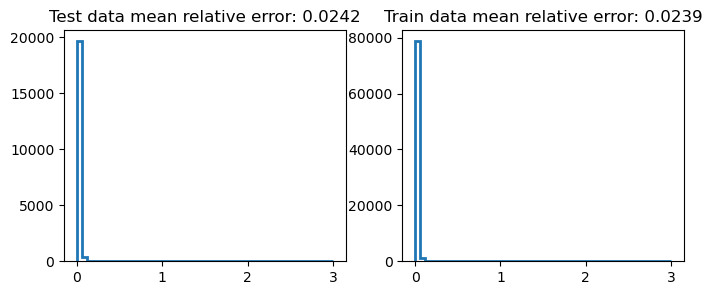

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
ax[0].hist(test_rel_err, histtype='step',lw=2, bins=50,range=[0,3])
ax[1].hist(train_rel_err, histtype='step',lw=2, bins=50,range=[0,3])
ax[0].set_title("Test data mean relative error: {:.4f}".format(np.mean(test_rel_err)))
ax[1].set_title("Train data mean relative error: {:.4f}".format(np.mean(train_rel_err)))
plt.show()